# APS Failure at Scania Trucks

Data Source: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks

### Relevent Information
The dataset consists of data collected from heavy Scania 
trucks in everyday usage. The system in focus is the 
**Air Pressure system (APS)** which generates pressurised 
air that are utilized in various functions in a truck, 
such as braking and gear changes. 
 
### Label Info
 1. **pos:** consists of component failures 
 for a specific component of the APS system
 
 2. **neg:** consists of trucks with failures 
 for components not related to the APS
 
 The data consists 
 of a subset of all available data, selected by experts.
 


**Number of Instance:** 60000<br>
**Number of positive:**  1000<br>
**Number of negative:** 59000


### Attribute Info

**Number of Attributes:** 170 + 1(class label)

1. The attribute names of the data have been anonymized for 
   proprietary reasons
 <br><br>
2. consists of both single numerical 
   counters and histograms consisting of bins with different 
   conditions.
 <br><br>
3. Typically the histograms have open-ended 
   conditions at each end. For example if we measuring 
   the ambient temperature "T" then the histogram could 
   be defined with 4 bins where: 

   bin 1 collect values for temperature T < -20<br>
   bin 2 collect values for temperature T >= -20 and T < 0     
   bin 3 collect values for temperature T >= 0 and T < 20  
   bin 4 collect values for temperature T > 20 

       |  b1  |  b2  |  b3  |  b4  |   
       ----------------------------- 
             -20     0      20
 <br><br>
4. The attributes are as follows: class, then 
  anonymized operational data. The operational data have 
  an identifier and a bin id, like "Identifier_Bin".
  In total there are 171 attributes, of which 7 are 
  histogram variabels. Missing values are denoted by "na".

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
aps_data = pd.read_csv('aps_failure_training_set.csv', skiprows=20, na_values='na')
aps_data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [3]:
aps_data.dtypes.value_counts()

float64    169
int64        1
object       1
dtype: int64

all of the features are numerical features.<br>
except for 1 which is our class label

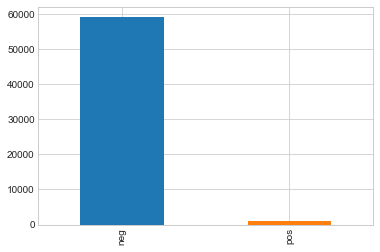

In [4]:
aps_data['class'].value_counts().plot(kind='bar');

In [5]:
aps_data['class'].value_counts() * 100 / len(aps_data)

neg    98.333333
pos     1.666667
Name: class, dtype: float64

In [6]:
def missing(df, axis=0):
    return aps_data.isna().any()

In [7]:
# Columns containing missing values
(aps_data.isna().any() == True).sum()

169

In [8]:
# Percentage of rows that does not contain any missing values
(aps_data.isna().any(1) == False).mean() * 100

0.98499999999999999

In [9]:
# Percentage of rows that does not contain any missing values grouped by class labels
aps_data.groupby('class').apply(lambda df: (df.isna().any(1) == False).mean() * 100)

class
neg    0.872881
pos    7.600000
dtype: float64

In [18]:
aps_data.groupby('class').apply(lambda df: (df.isna().any(1) == False).sum()) * 100 / (aps_data.isna().any(1) == False).sum()

class
neg    87.14044
pos    12.85956
dtype: float64

In [10]:
# Percentage of missing values in each columns
percnt_missing = aps_data.isna().mean() * 100

In [11]:
# Top 20 columns that contain missing values
percnt_missing.sort_values(ascending=False).head(20)

br_000    82.106667
bq_000    81.203333
bp_000    79.566667
bo_000    77.221667
cr_000    77.215000
ab_000    77.215000
bn_000    73.348333
bm_000    65.915000
bl_000    45.461667
bk_000    38.390000
cf_000    24.768333
co_000    24.768333
cg_000    24.768333
ch_000    24.768333
ad_000    24.768333
cx_000    23.013333
ct_000    23.013333
cv_000    23.013333
cu_000    23.013333
cy_000    23.013333
dtype: float64

Text(0,0.5,'Percentage of missing values')

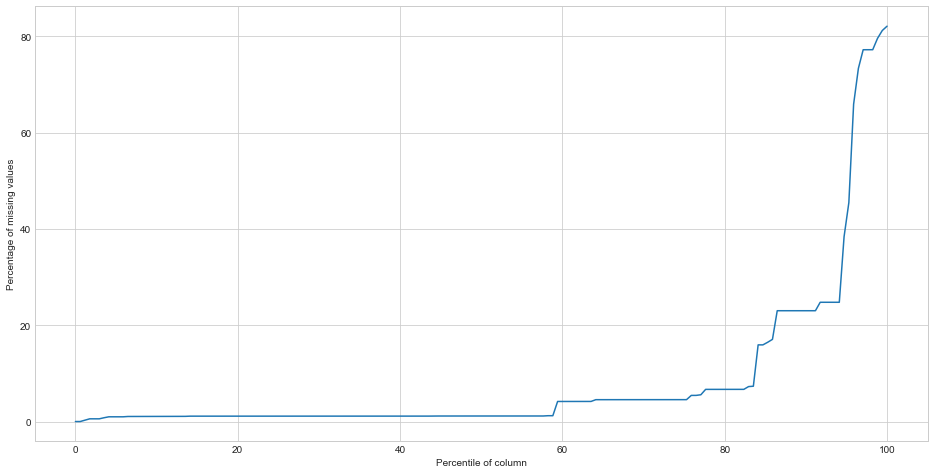

In [12]:
plt.figure(figsize=(16, 8))
plt.plot(np.linspace(0, 100, len(percnt_missing)),percnt_missing.sort_values())
plt.xlabel('Percentile of column')
plt.ylabel('Percentage of missing values')

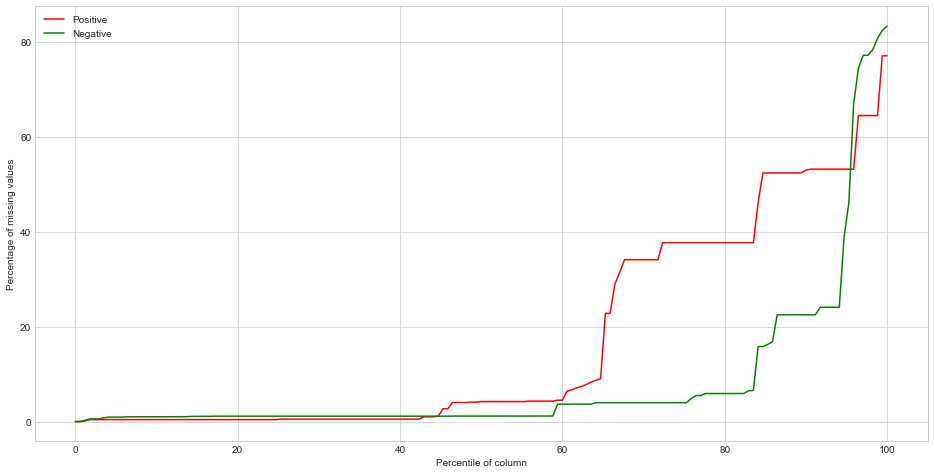

In [13]:
percnt_miss_gp = aps_data.groupby('class').apply(lambda df: df.isna().mean() * 100)

pos_missing = percnt_miss_gp.loc['pos']
neg_missing = percnt_miss_gp.loc['neg']

plt.figure(figsize=(16, 8))
plt.plot(np.linspace(0, 100, len(pos_missing)),pos_missing.sort_values(), 'r', label='Positive')
plt.plot(np.linspace(0, 100, len(neg_missing)),neg_missing.sort_values(), 'g', label='Negative')
plt.xlabel('Percentile of column')
plt.ylabel('Percentage of missing values')
plt.legend();

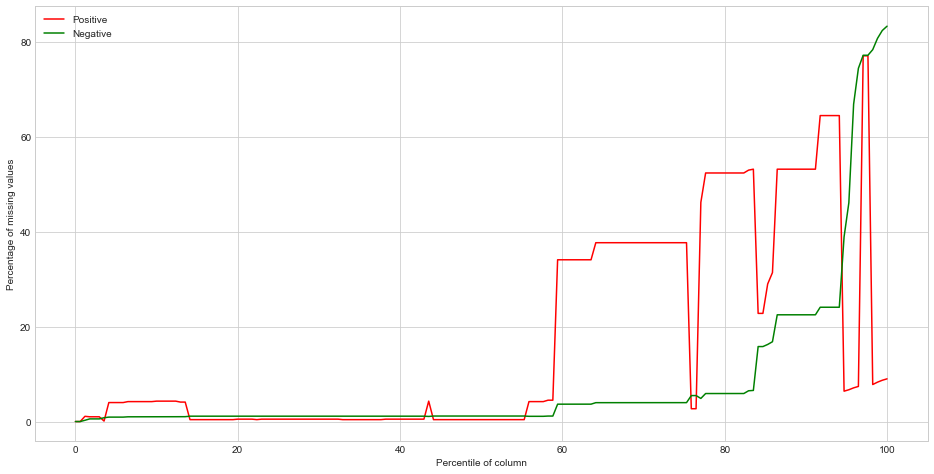

In [16]:
percnt_miss = aps_data.groupby('class').apply(lambda df: df.isna().mean() * 100)
percnt_miss = percnt_miss.transpose()
percnt_miss['Total'] = aps_data.isna().mean() * 100
percnt_miss.sort_values('Total', inplace=True)
# pos_missing = percnt_miss_gp['pos']
# neg_missing = percnt_miss_gp['neg']


plt.figure(figsize=(16, 8))
plt.plot(np.linspace(0, 100, len(percnt_miss)),percnt_miss['pos'], 'r', label='Positive')
plt.plot(np.linspace(0, 100, len(percnt_miss)),percnt_miss['neg'], 'g', label='Negative')
# plt.plot(np.linspace(0, 100, len(percnt_miss)),percnt_miss['Total'], 'b', label='Total')
# plt.plot(percnt_miss['pos'], 'r', label='Positive')
# plt.plot(percnt_miss['neg'], 'g', label='Negative')
plt.xlabel('Percentile of column')
plt.ylabel('Percentage of missing values')
# plt.xlim((0, 20))
plt.legend();

###### Split features and labels

All the features have missing values except 'aa_000' feature

In [127]:
row_missing = aps_data.isna().mean(1).sort_values() * 100

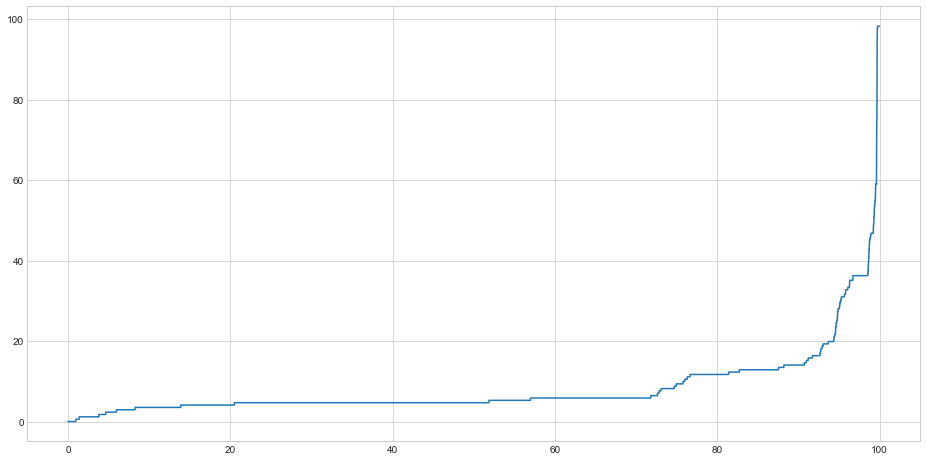

In [132]:
plt.figure(figsize=(16, 8))
plt.plot(np.linspace(0, 100, len(row_missing)),row_missing)
# plt.xlim((98, 100))

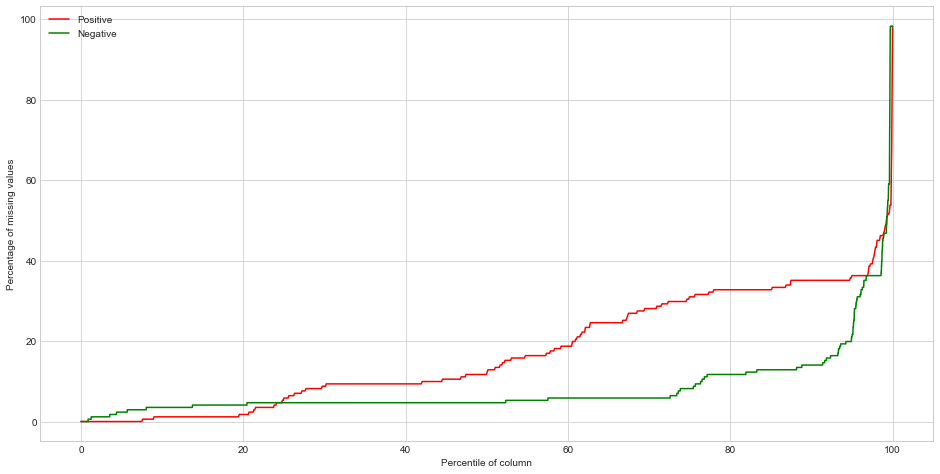

In [138]:
percnt_miss_gp = aps_data.groupby('class').apply(lambda df: df.isna().mean(1) * 100)

pos_missing = percnt_miss_gp.loc['pos']
neg_missing = percnt_miss_gp.loc['neg']

plt.figure(figsize=(16, 8))
plt.plot(np.linspace(0, 100, len(pos_missing)),pos_missing.sort_values(), 'r', label='Positive')
plt.plot(np.linspace(0, 100, len(neg_missing)),neg_missing.sort_values(), 'g', label='Negative')
plt.xlabel('Percentile of points')
plt.ylabel('Percentage of missing values')
plt.legend();

In [20]:
data_clean = aps_data[aps_data.isna().any(1) == False]

In [22]:
data_clean.shape

(591, 171)

In [23]:
data_clean.columns

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

In [28]:
aps_data.corr()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,0.073103,-0.032055,-0.001903,0.061971,0.089474,0.018610,0.143153,0.285815,0.495529,...,0.735324,0.739211,0.717810,0.727240,0.726984,0.606232,0.471707,0.248039,0.019865,0.037099
ab_000,0.073103,1.000000,-0.019411,0.047281,0.031031,0.053532,0.008418,0.013658,0.050068,0.068100,...,0.062280,0.098808,0.068790,0.078091,0.048717,0.023867,0.039369,0.074119,0.055590,0.162948
ac_000,-0.032055,-0.019411,1.000000,-0.002380,-0.004997,-0.010554,0.017620,-0.001088,-0.016665,-0.038680,...,-0.013692,-0.008111,-0.009849,-0.011206,-0.021430,-0.029417,0.016908,0.024354,-0.006571,0.014228
ad_000,-0.001903,0.047281,-0.002380,1.000000,-0.000214,-0.000269,-0.000047,-0.000131,-0.000222,-0.000423,...,-0.002090,-0.002047,-0.001940,-0.001667,-0.001398,-0.000829,-0.002161,-0.001050,-0.000102,-0.000120
ae_000,0.061971,0.031031,-0.004997,-0.000214,1.000000,0.823108,-0.000430,-0.000832,0.005057,0.034163,...,0.017338,0.024905,0.017311,0.039967,0.085884,0.052357,-0.010850,-0.008206,0.070886,0.041715
af_000,0.089474,0.053532,-0.010554,-0.000269,0.823108,1.000000,-0.000534,-0.001017,0.010518,0.052386,...,0.032896,0.047326,0.030789,0.067002,0.132319,0.070306,-0.013976,-0.010237,0.106281,0.060710
ag_000,0.018610,0.008418,0.017620,-0.000047,-0.000430,-0.000534,1.000000,0.165376,0.090570,0.032054,...,0.023087,0.033418,0.033600,0.022740,0.011185,0.000307,-0.000823,-0.001230,-0.000072,0.000244
ag_001,0.143153,0.013658,-0.001088,-0.000131,-0.000832,-0.001017,0.165376,1.000000,0.788352,0.421545,...,0.104843,0.108185,0.136298,0.233816,0.198646,0.044186,0.004878,-0.004309,0.002875,0.010930
ag_002,0.285815,0.050068,-0.016665,-0.000222,0.005057,0.010518,0.090570,0.788352,1.000000,0.750132,...,0.261865,0.256203,0.285219,0.433794,0.385500,0.182990,0.009466,-0.009498,0.011824,0.034202
ag_003,0.495529,0.068100,-0.038680,-0.000423,0.034163,0.052386,0.032054,0.421545,0.750132,1.000000,...,0.459345,0.444828,0.460427,0.612682,0.620278,0.505565,0.021151,-0.019311,0.020560,0.024210


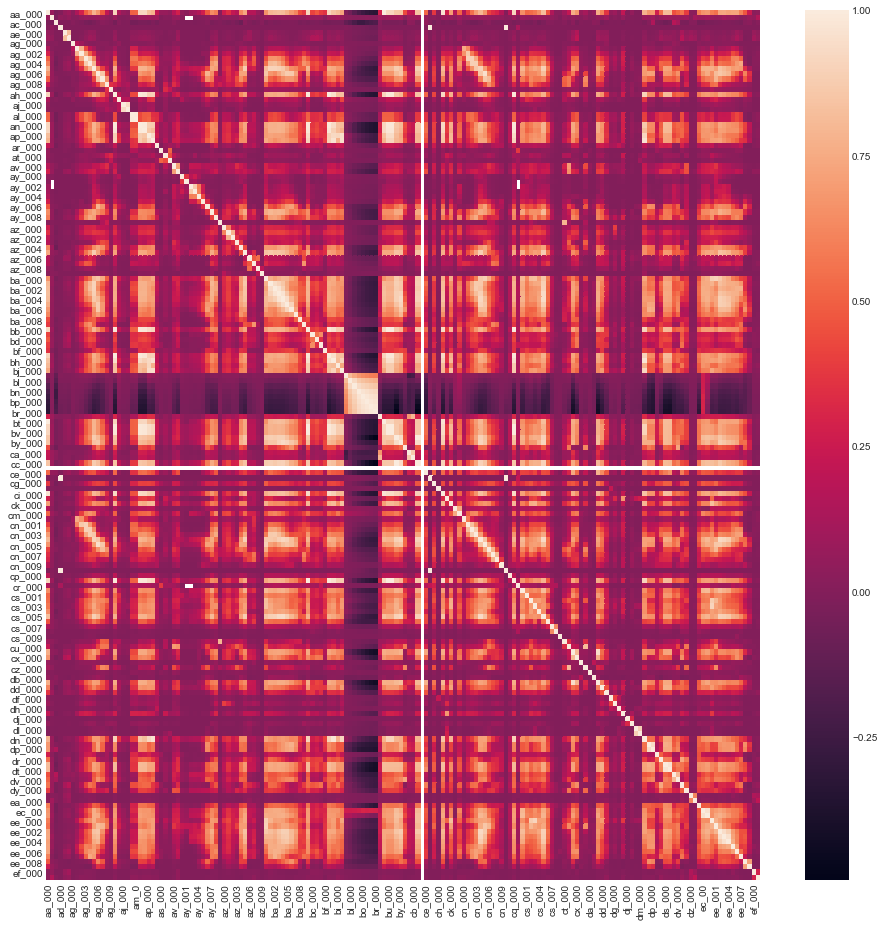

In [31]:
plt.figure(figsize=(16, 16))
sns.heatmap(aps_data.corr())

C:\Users\Ujjwal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Ujjwal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Ujjwal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Ujjwal\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


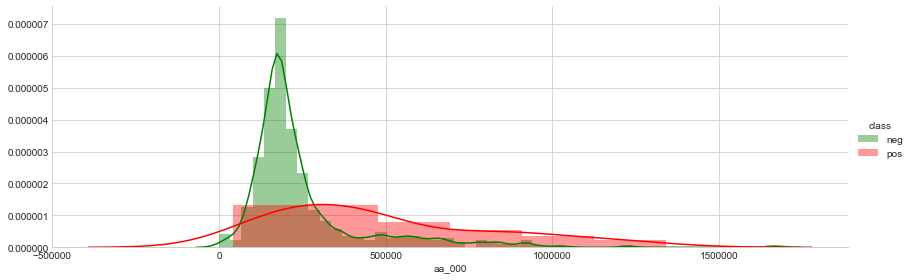

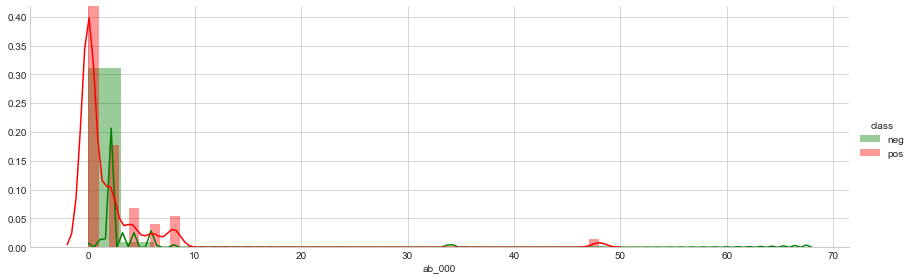

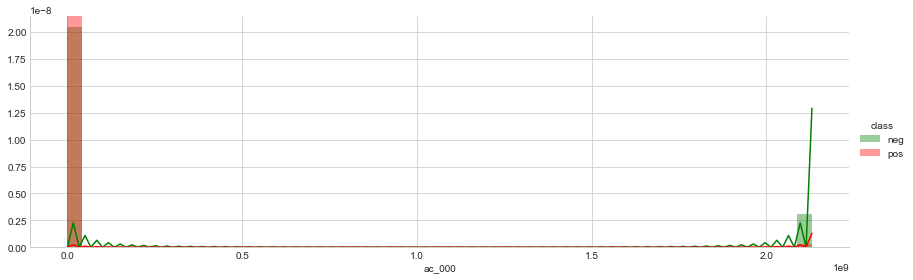

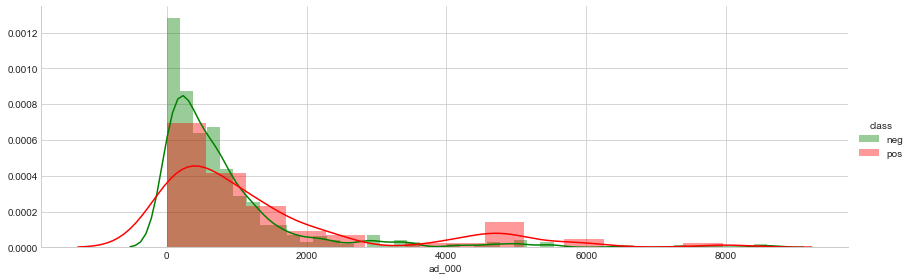

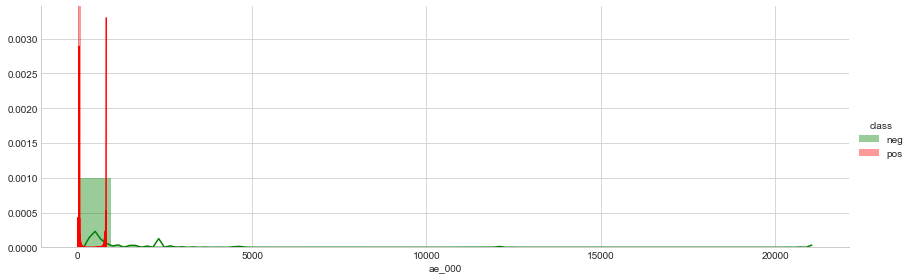

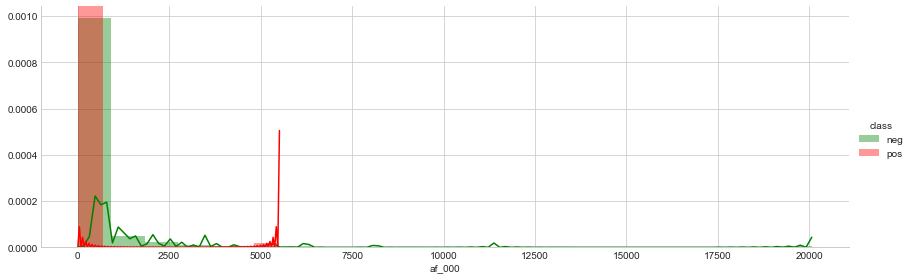

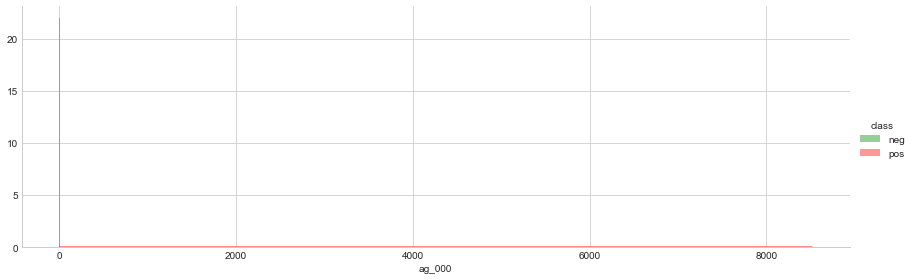

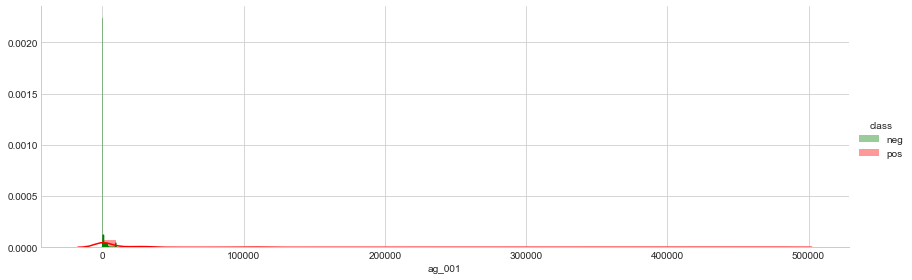

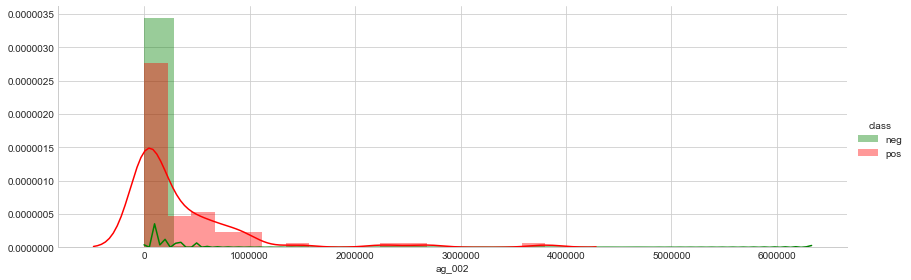

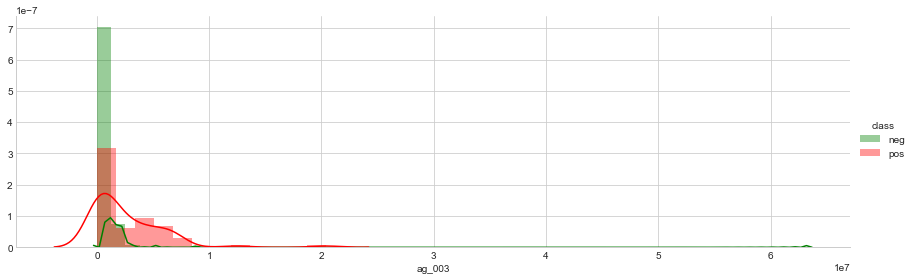

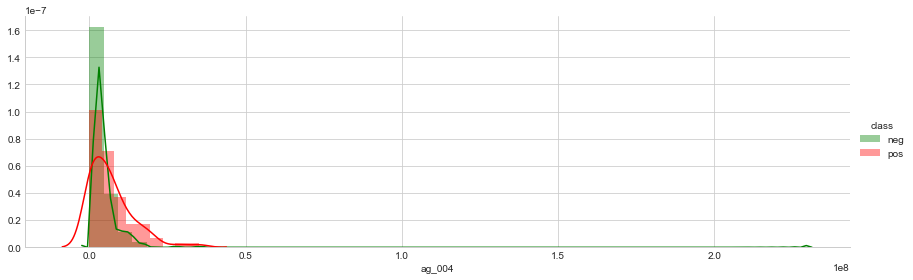

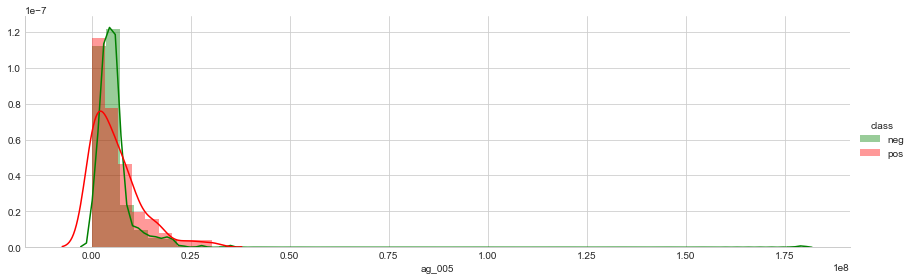

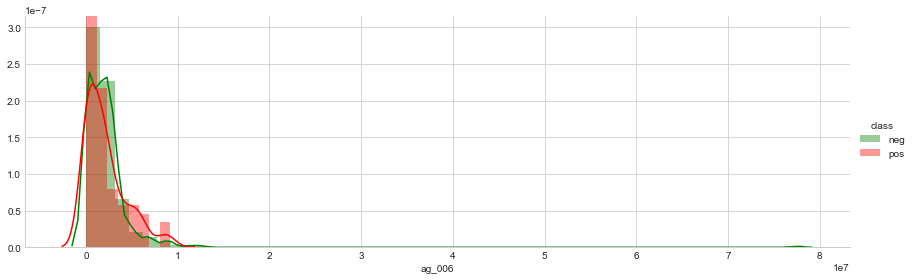

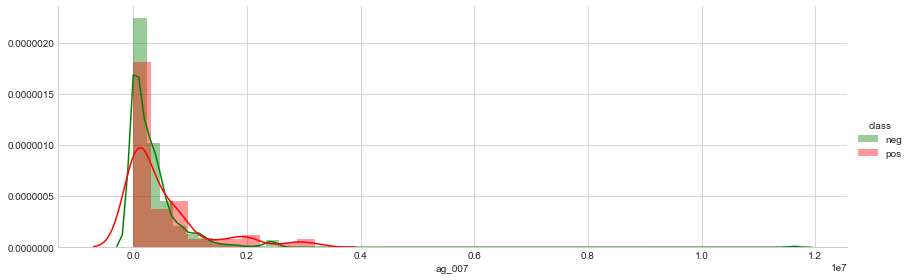

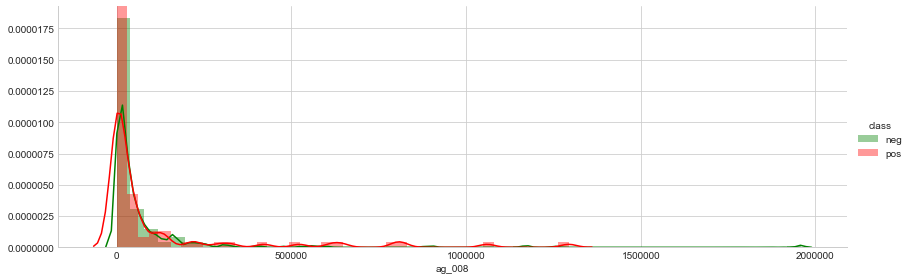

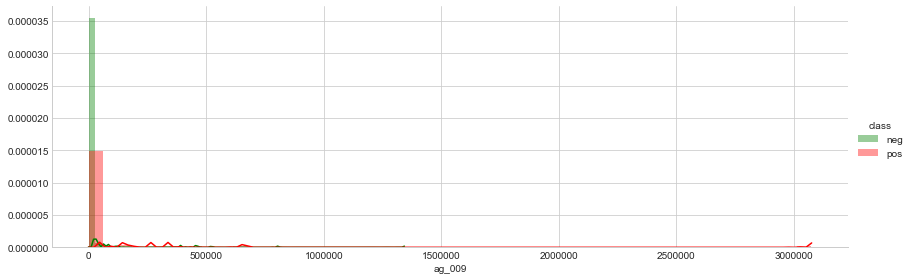

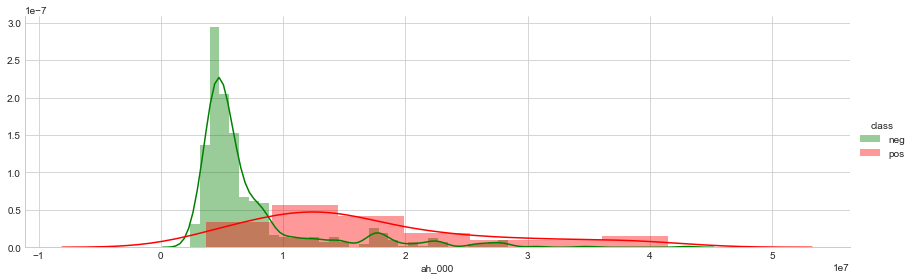

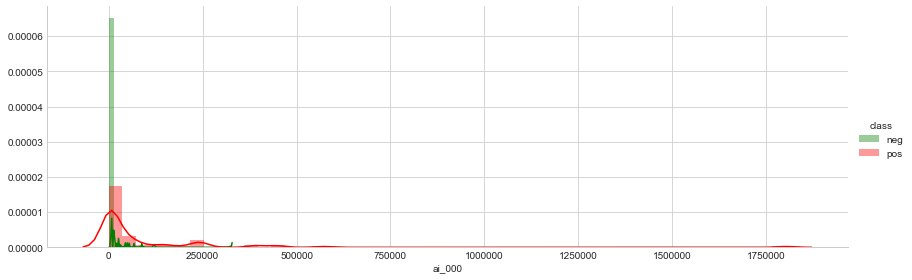

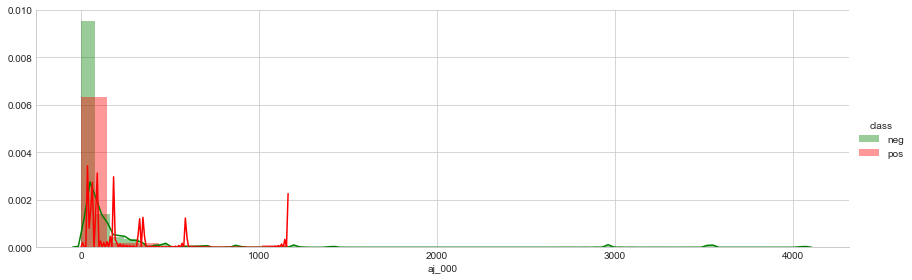

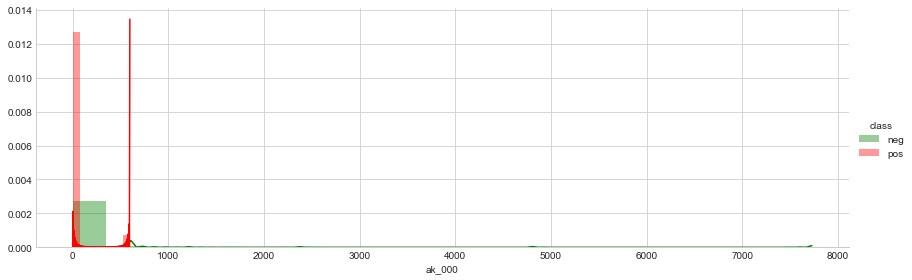

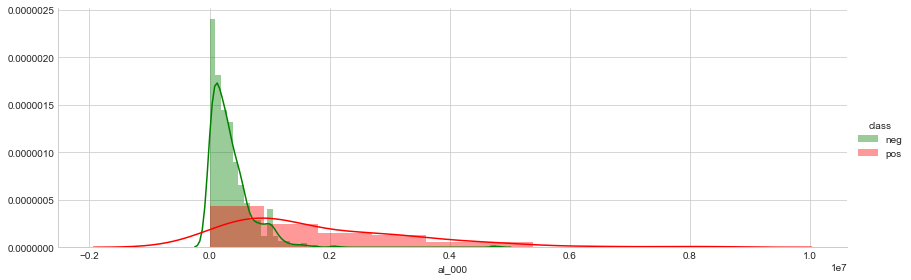

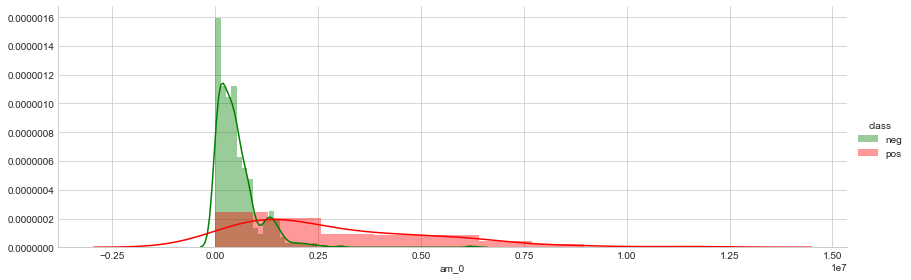

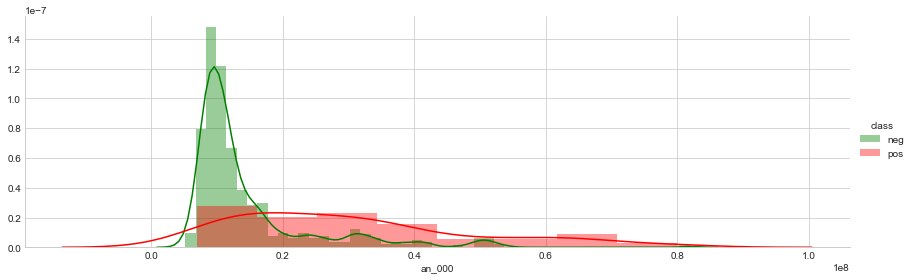

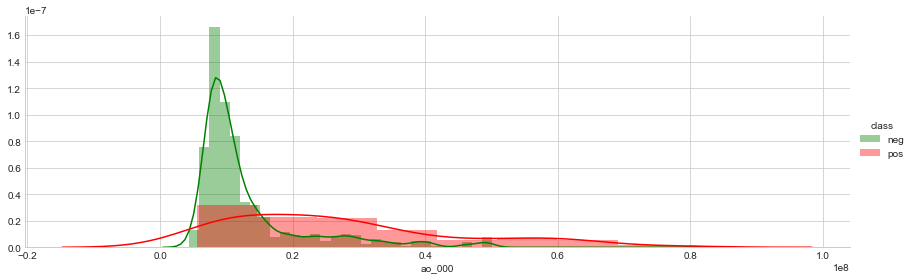

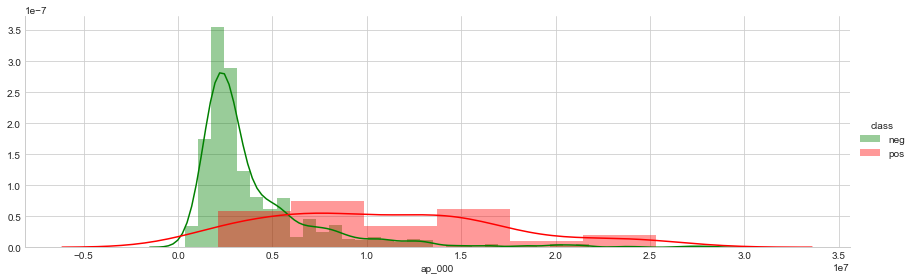

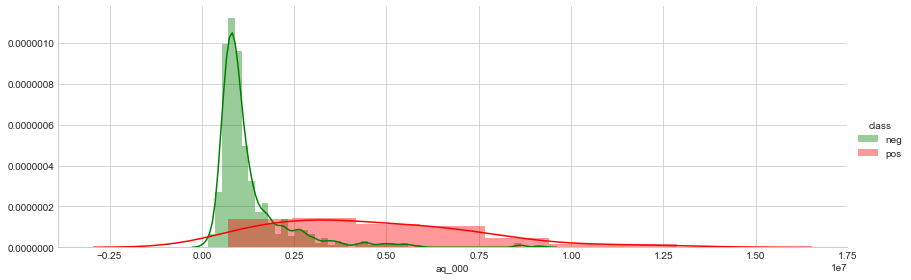

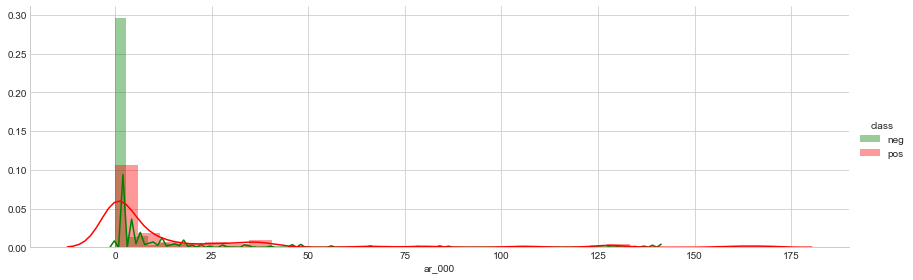

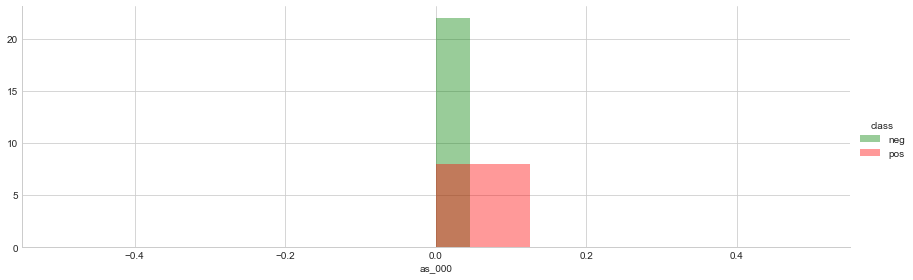

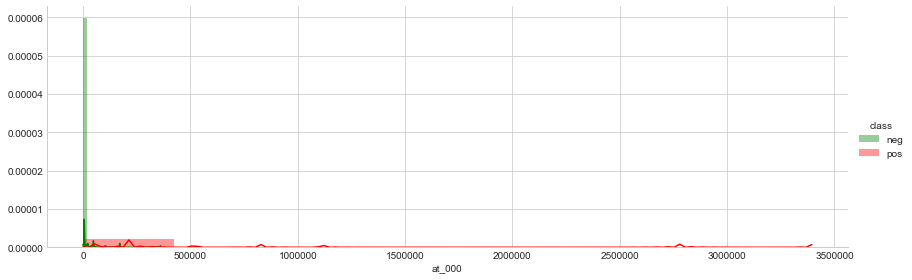

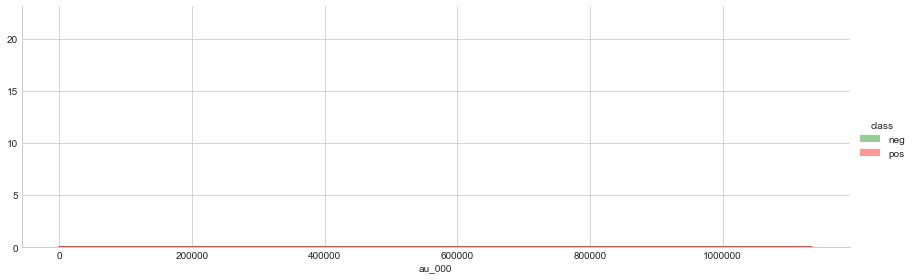

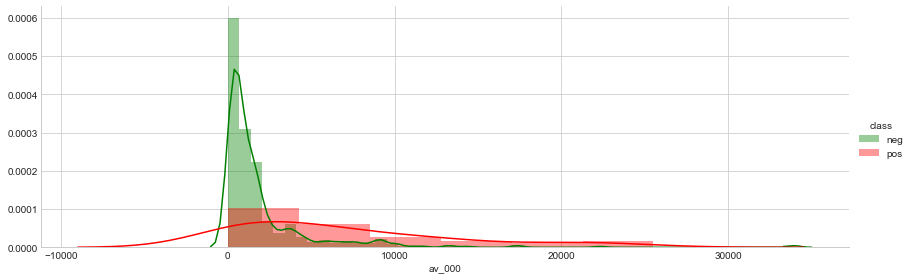

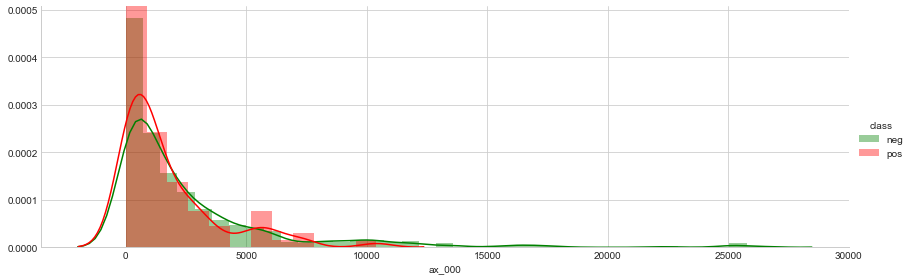

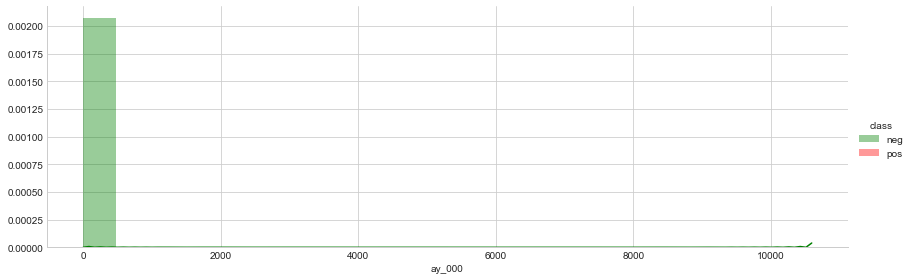

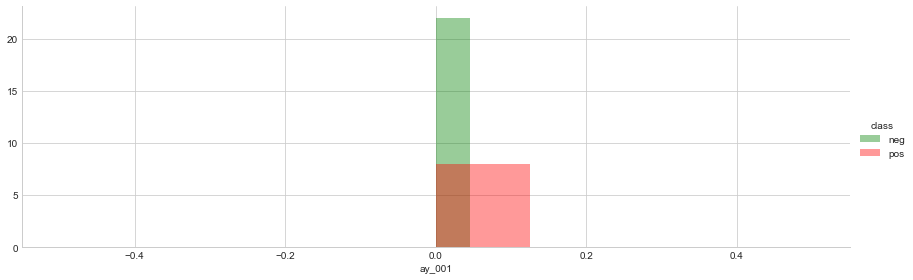

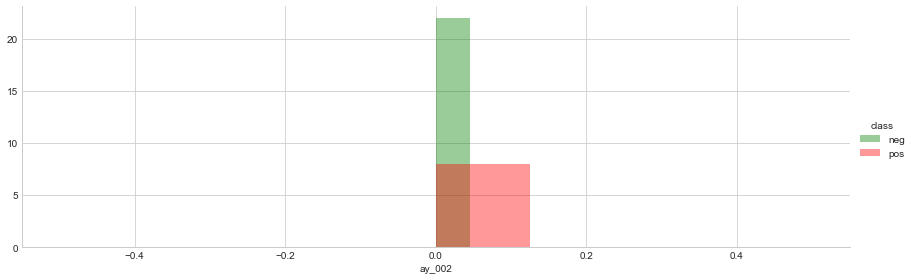

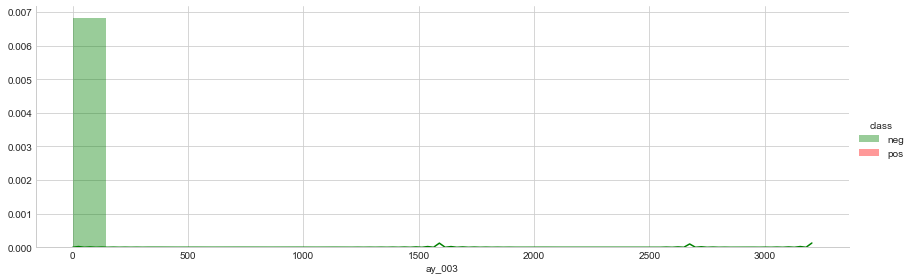

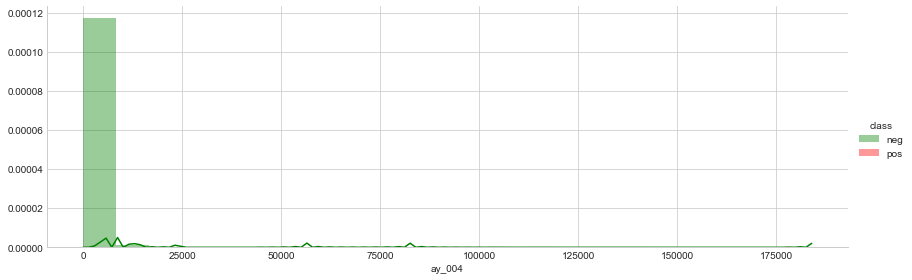

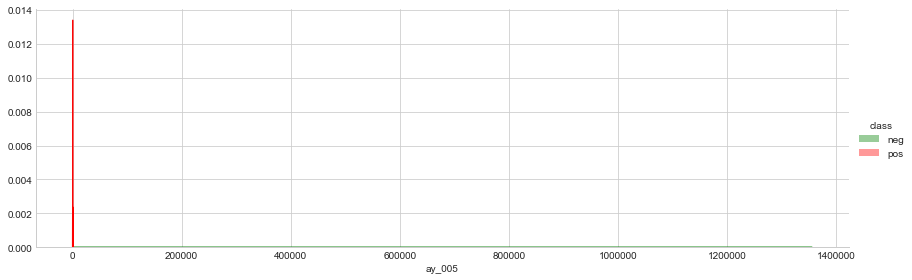

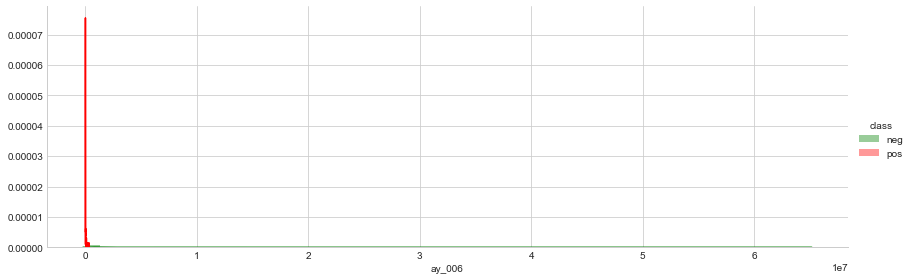

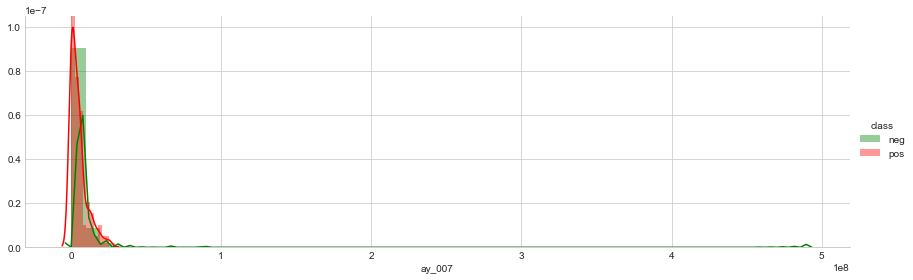

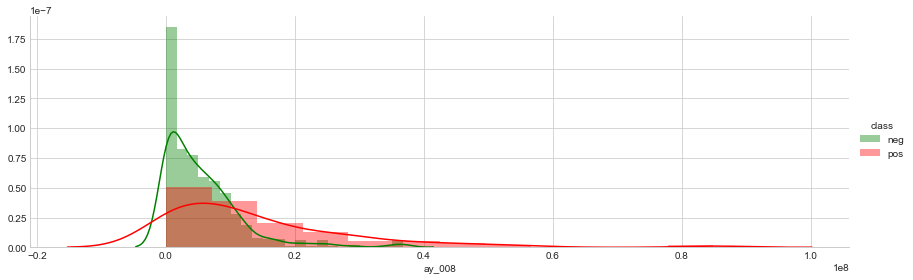

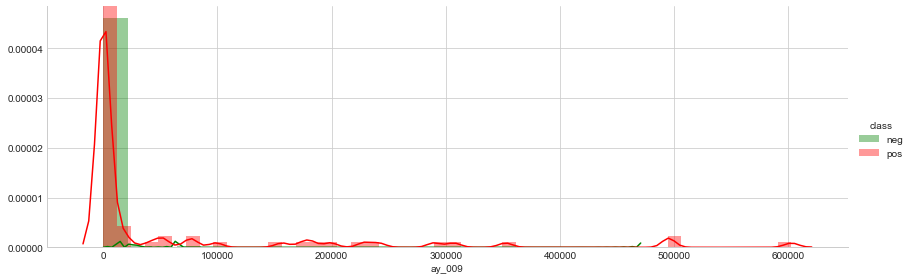

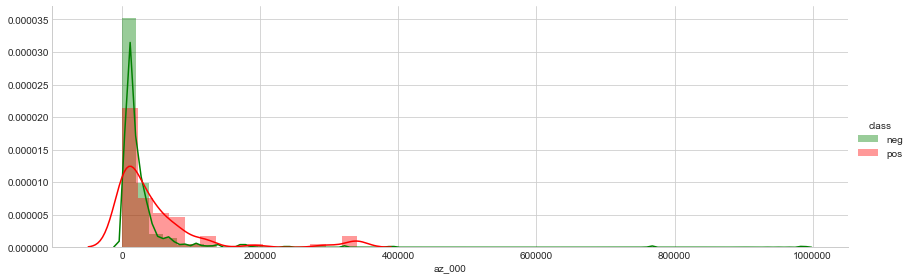

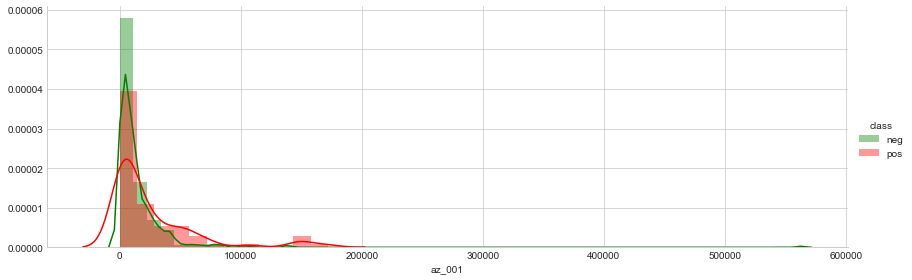

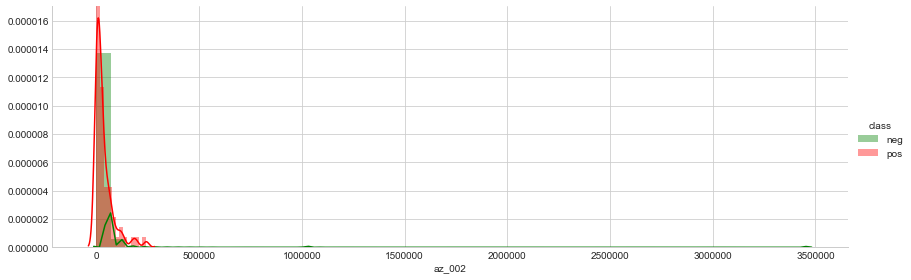

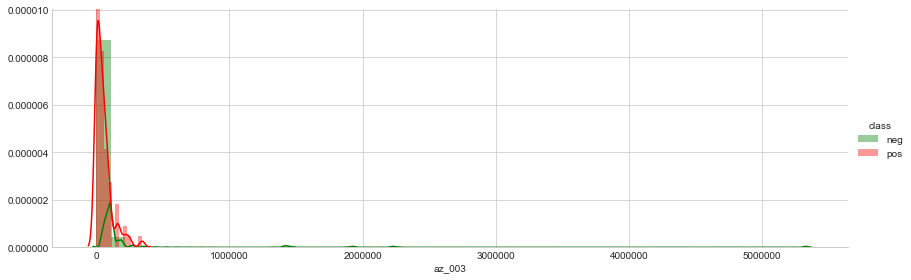

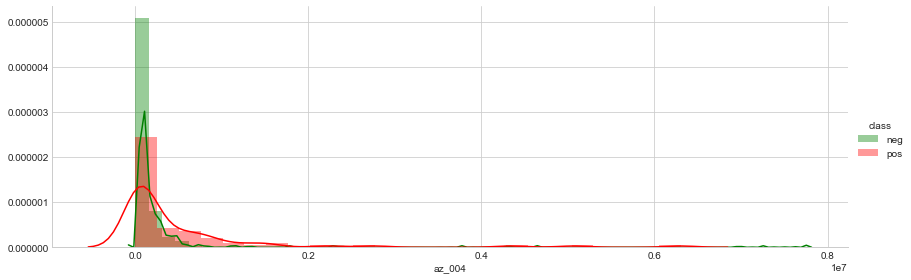

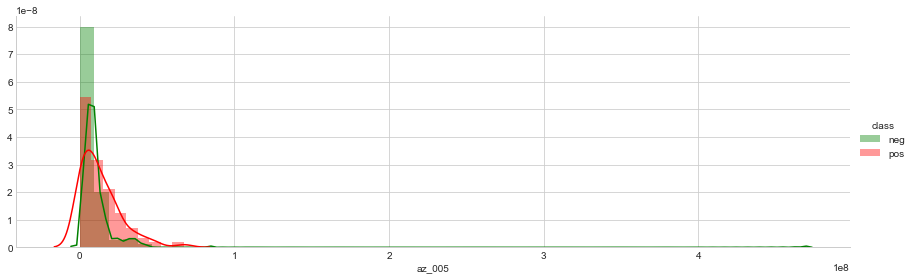

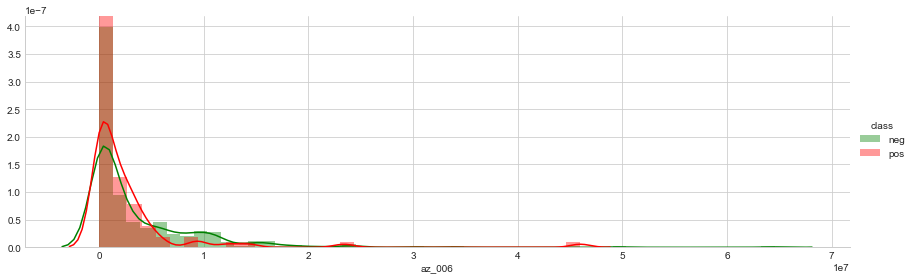

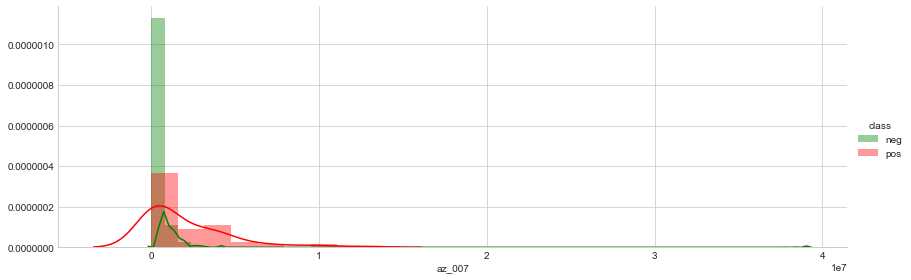

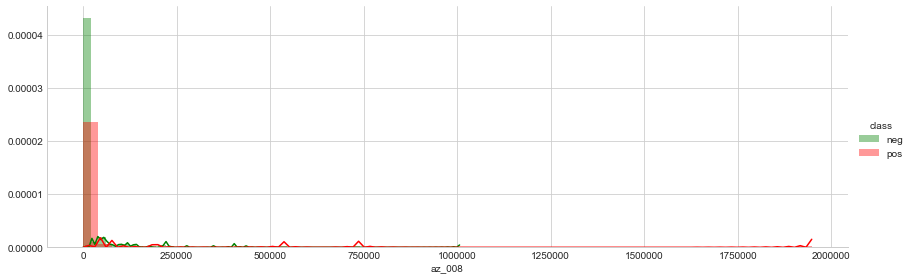

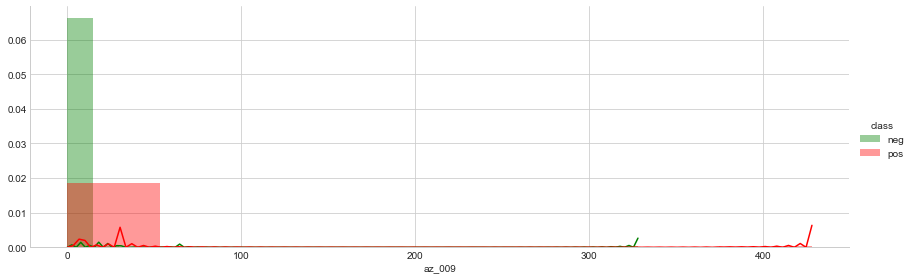

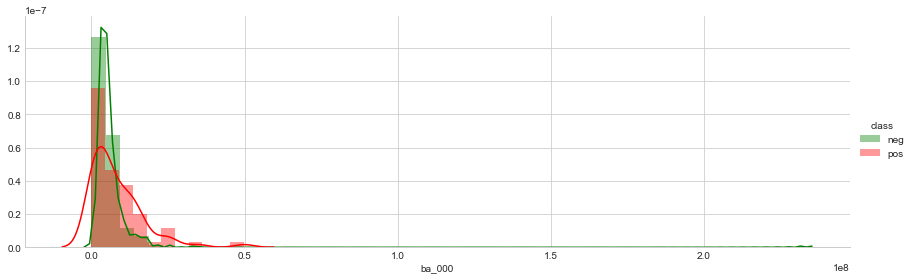

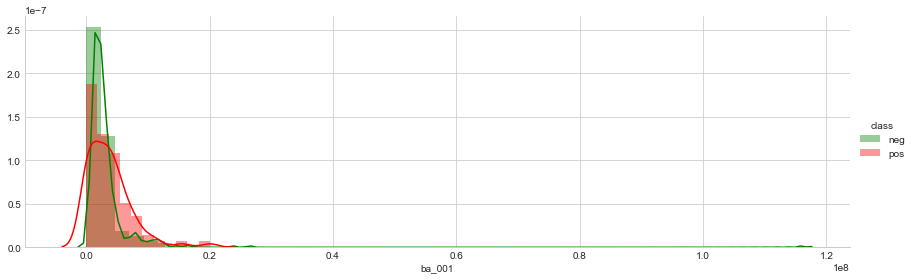

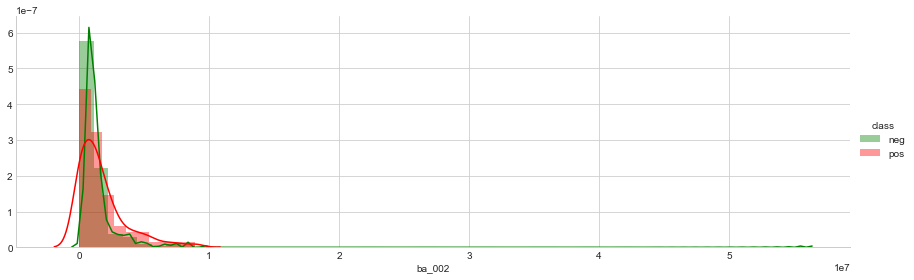

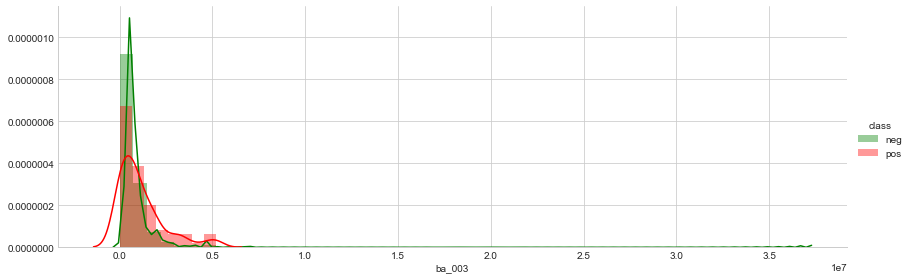

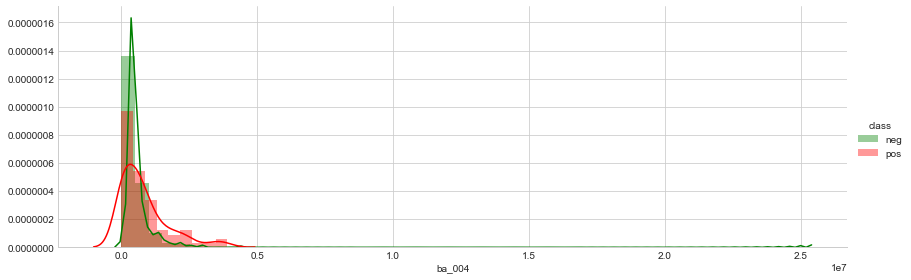

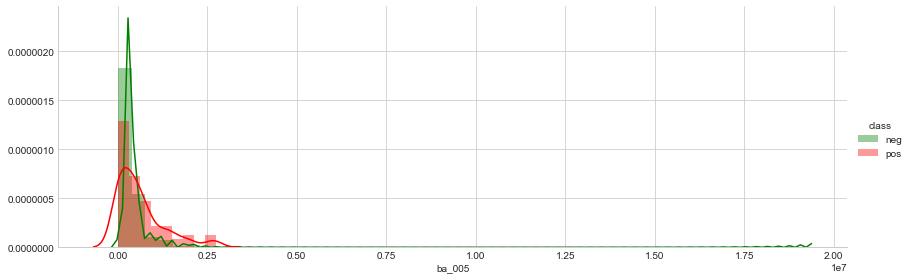

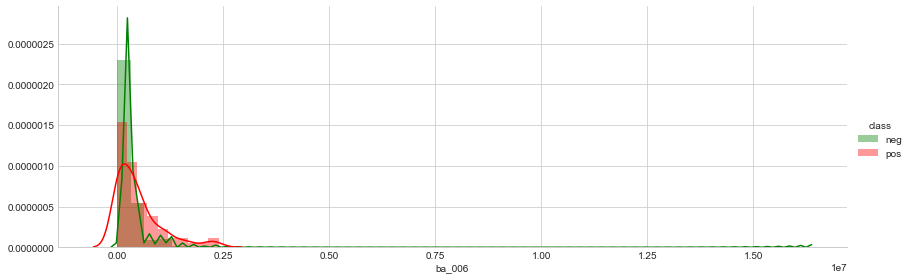

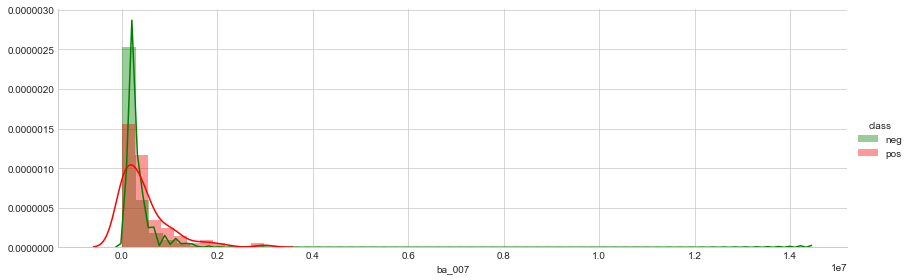

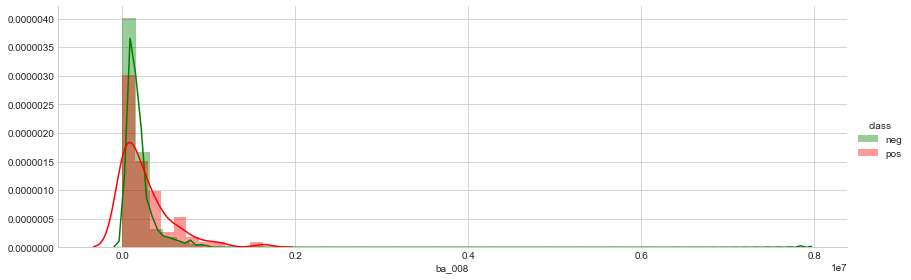

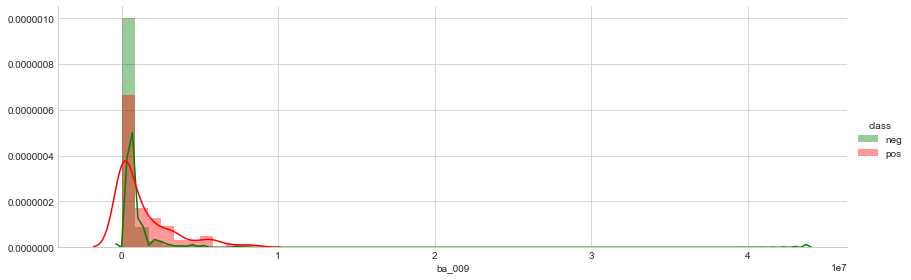

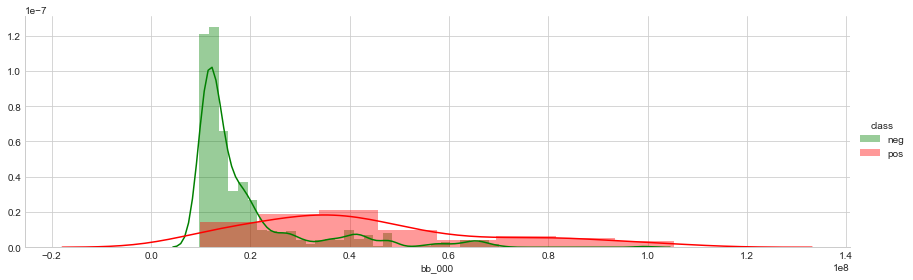

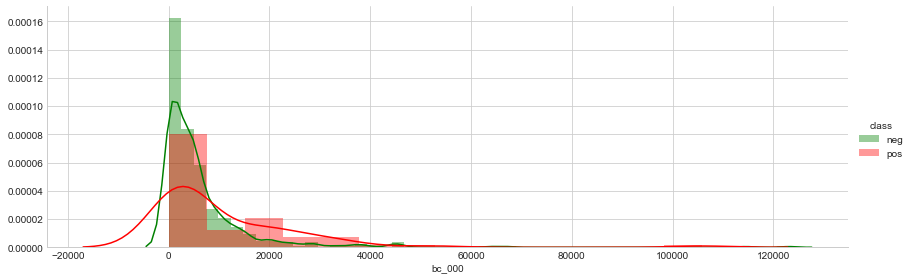

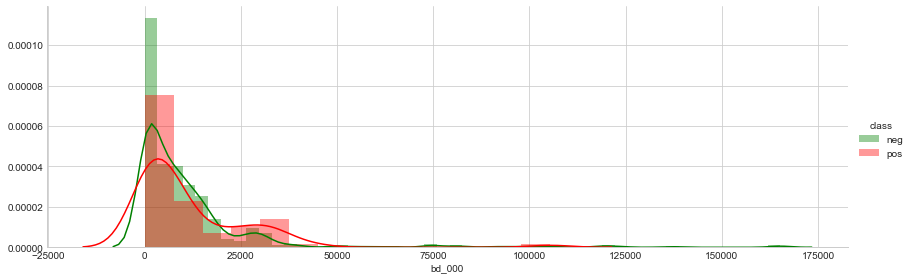

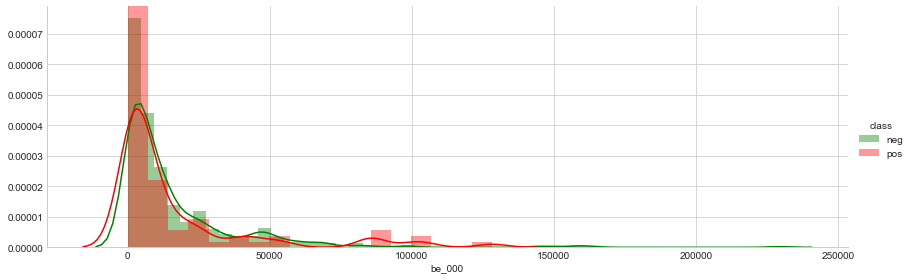

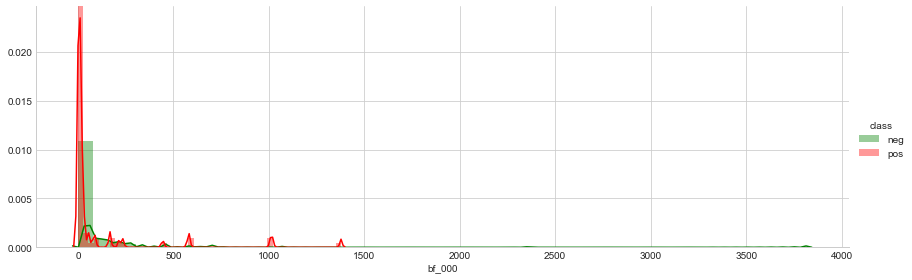

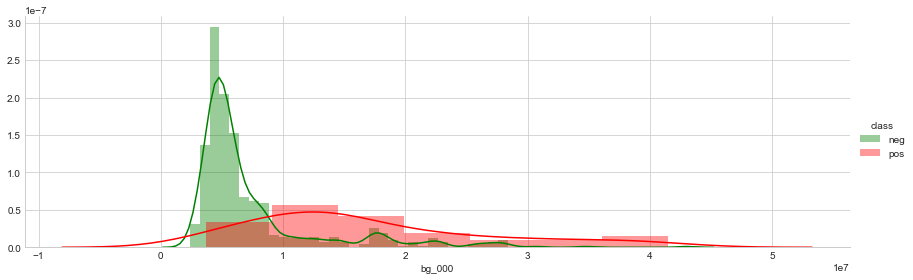

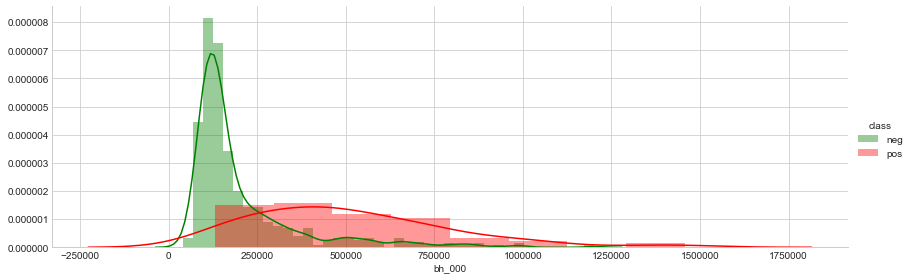

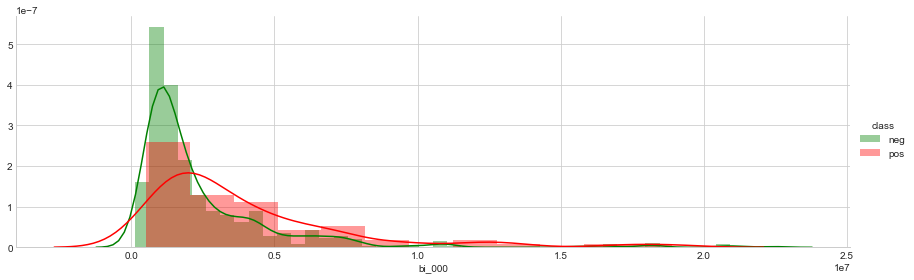

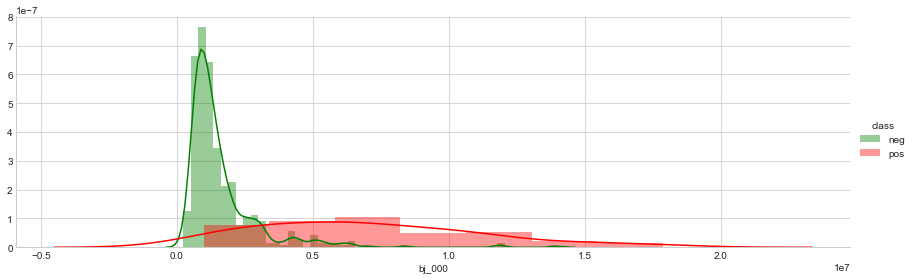

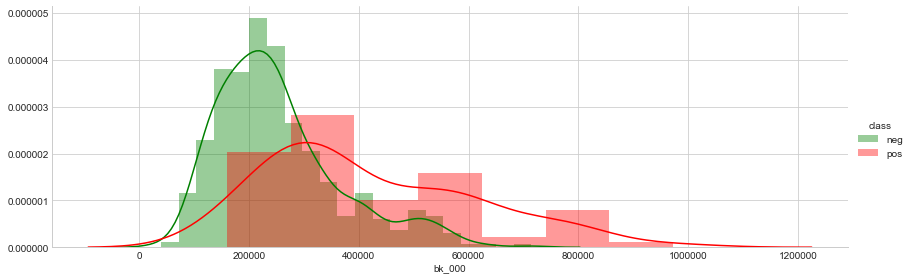

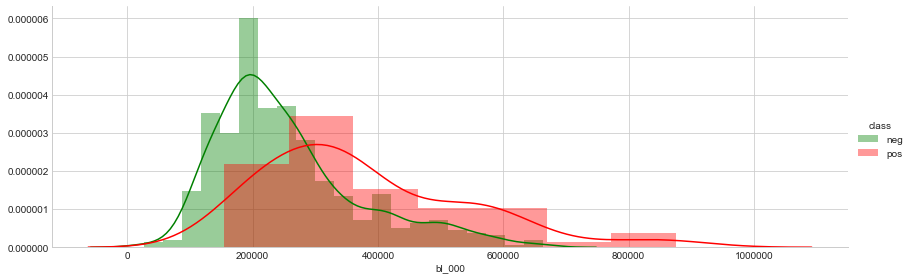

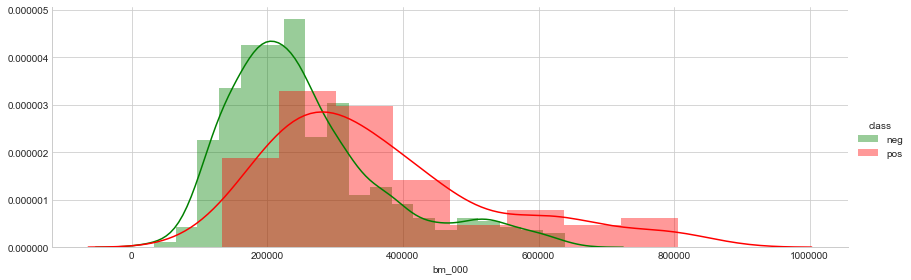

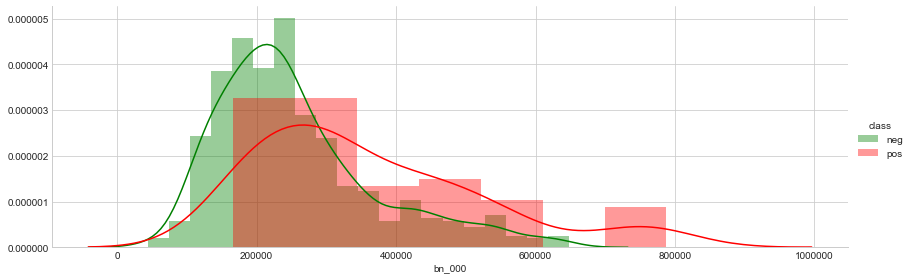

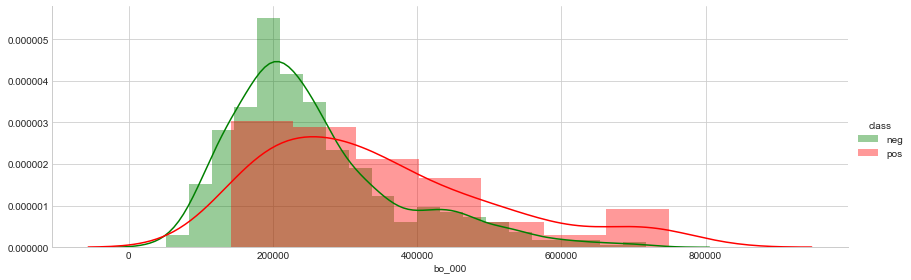

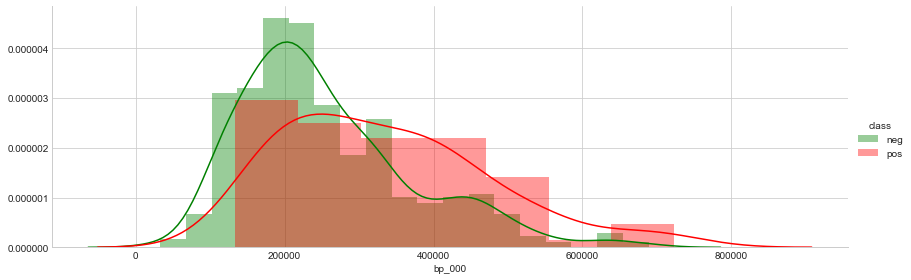

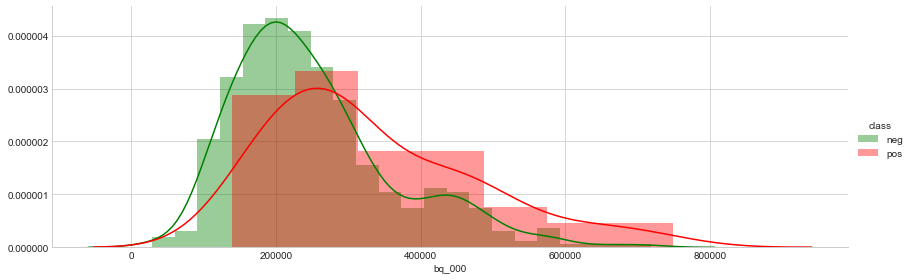

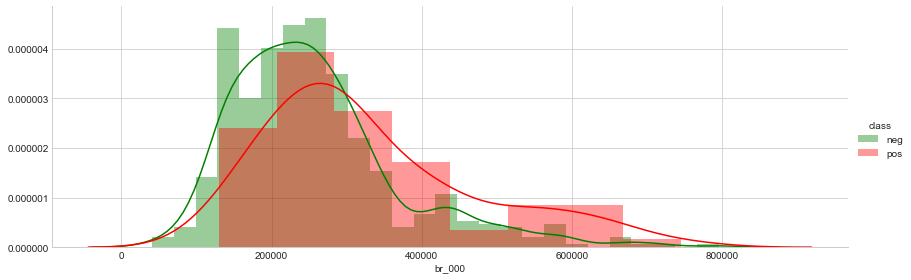

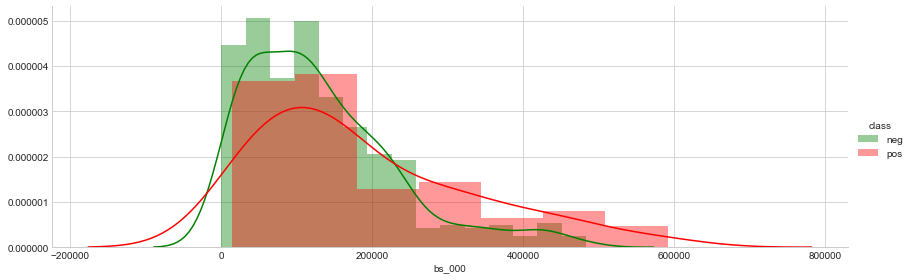

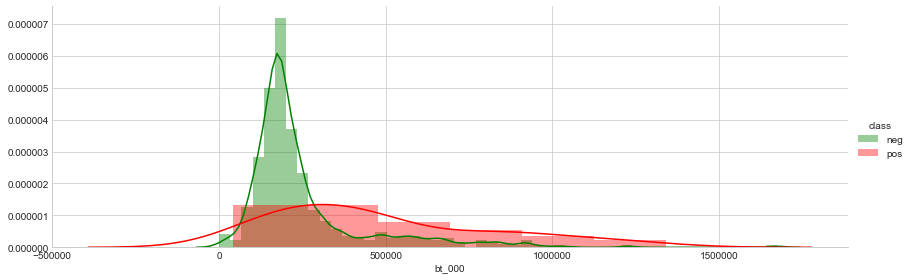

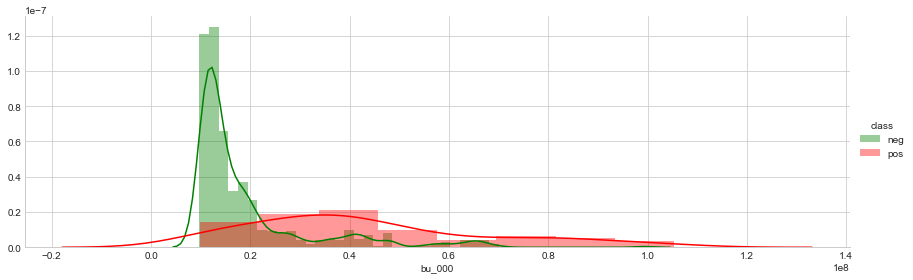

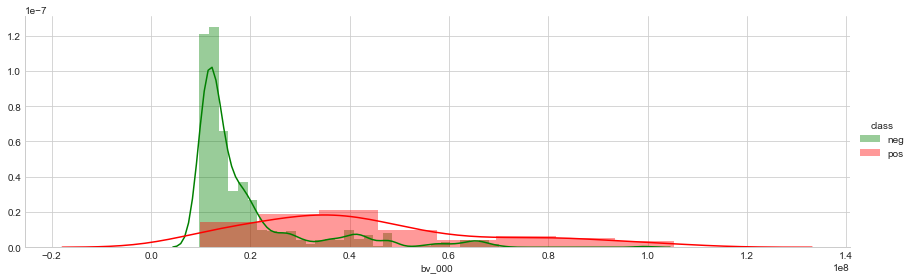

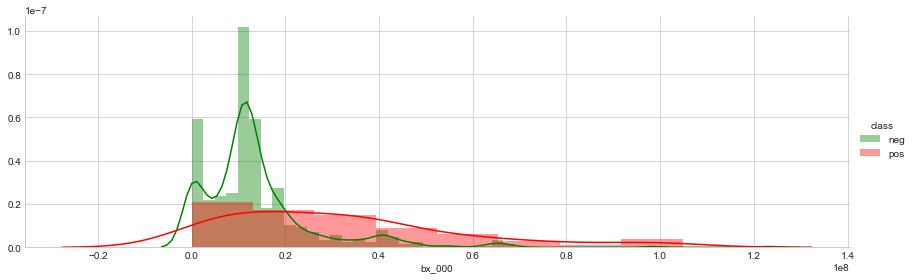

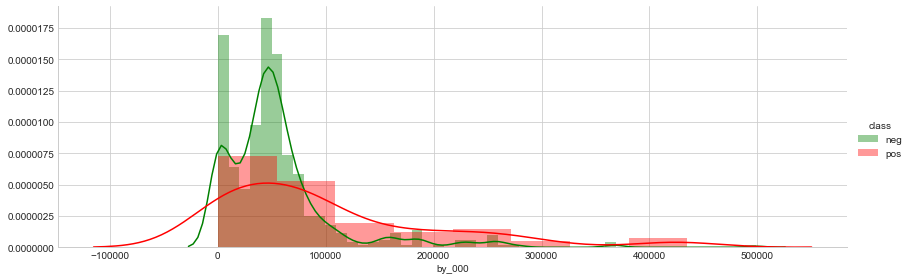

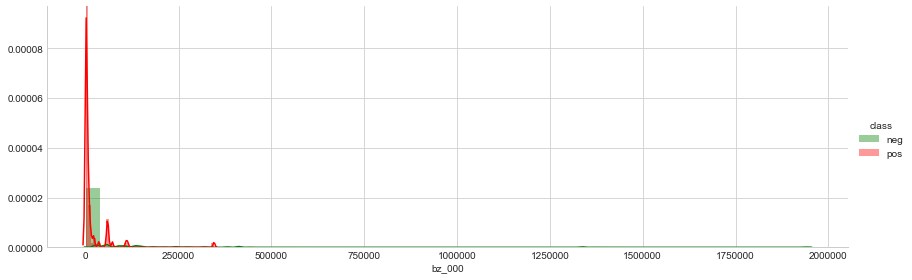

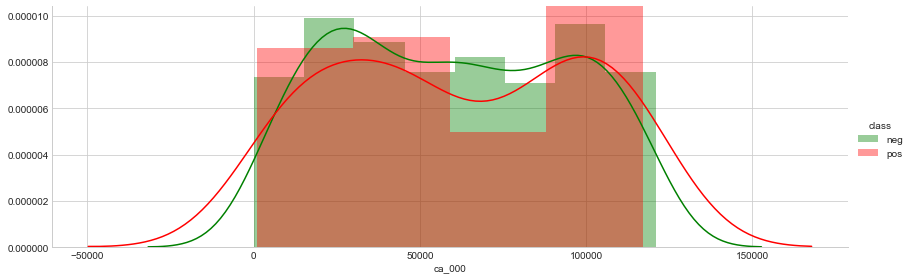

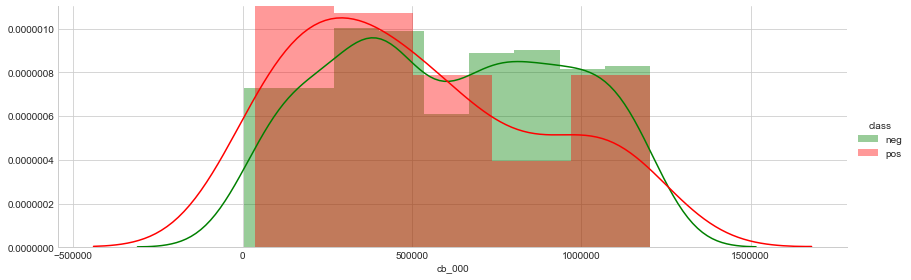

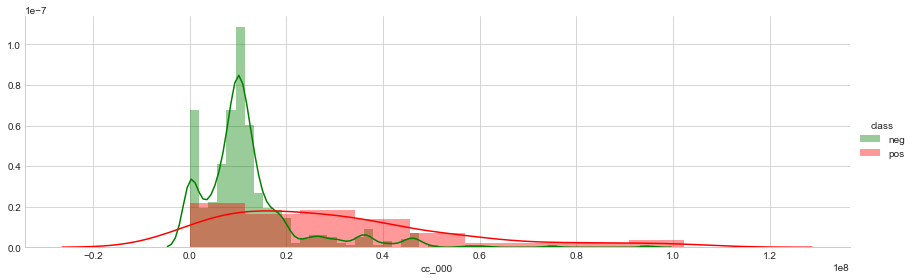

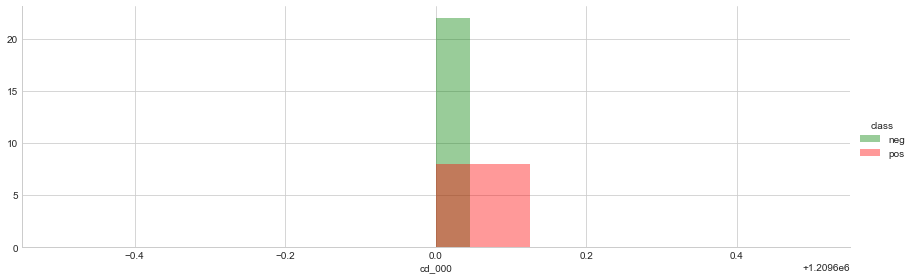

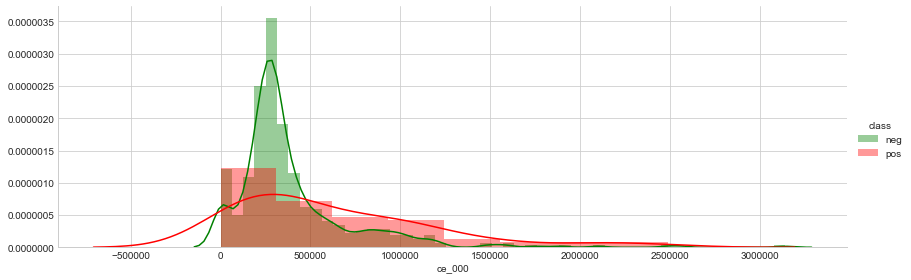

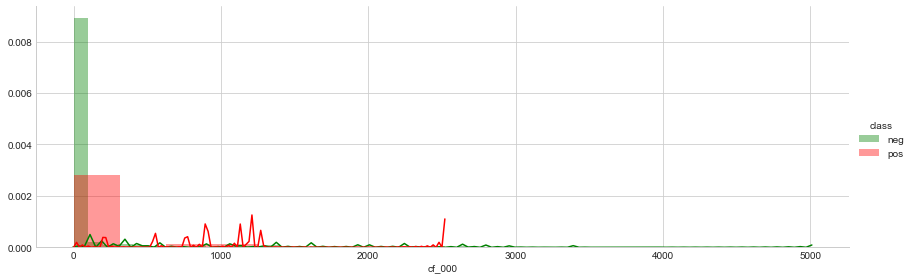

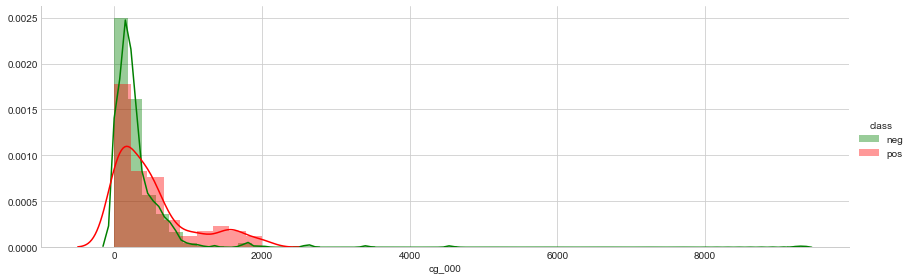

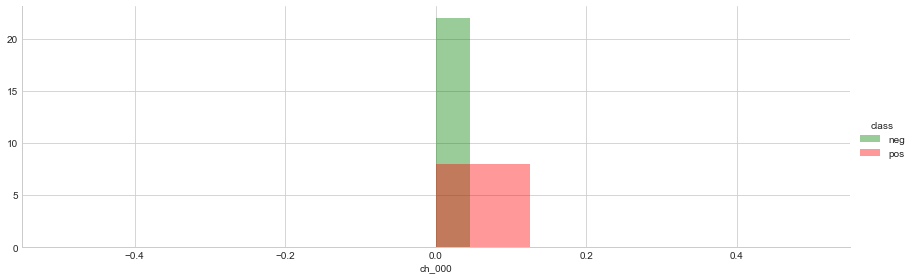

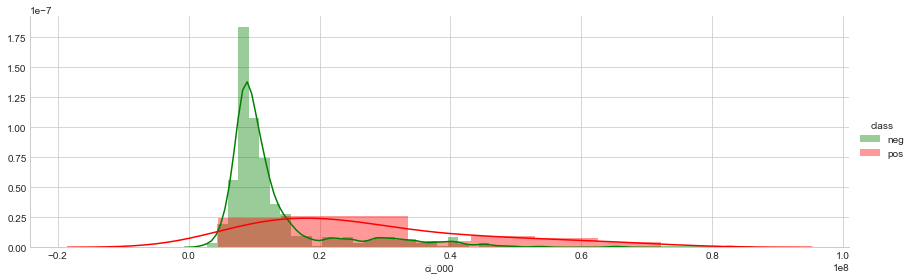

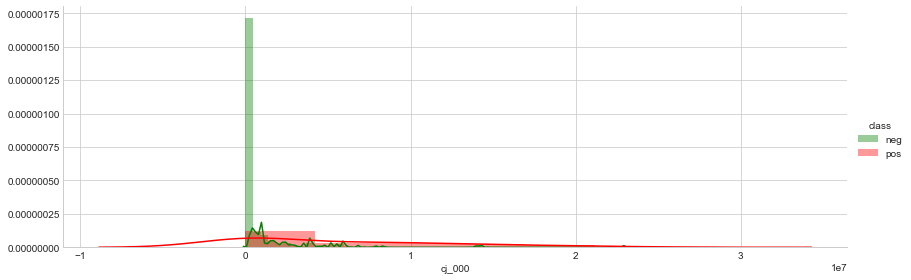

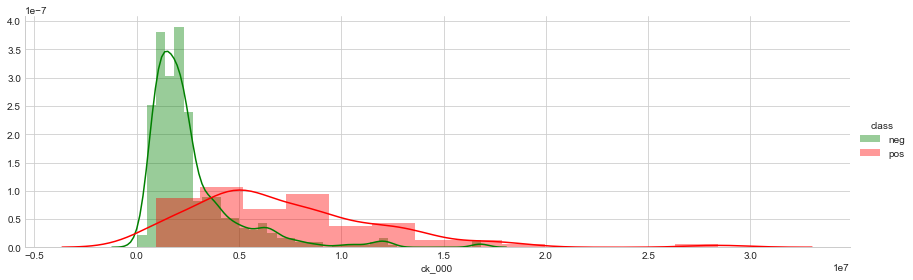

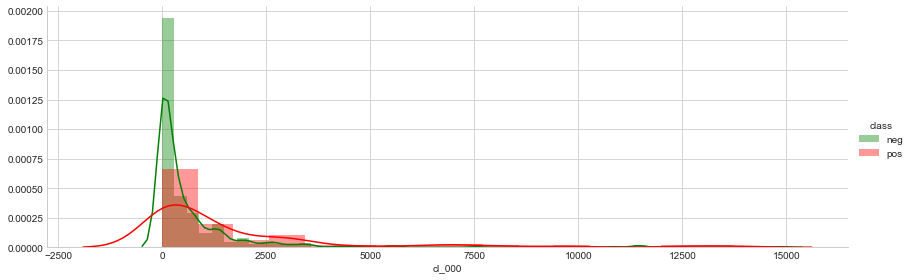

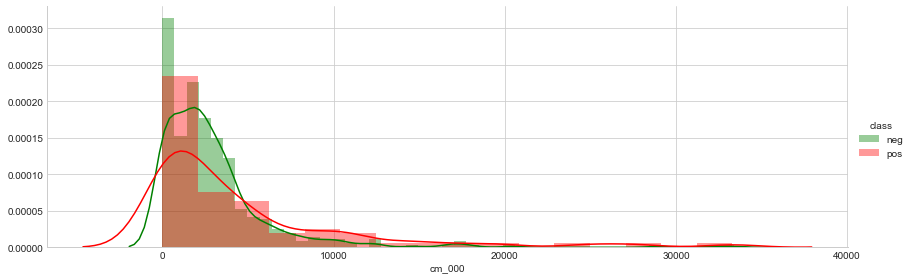

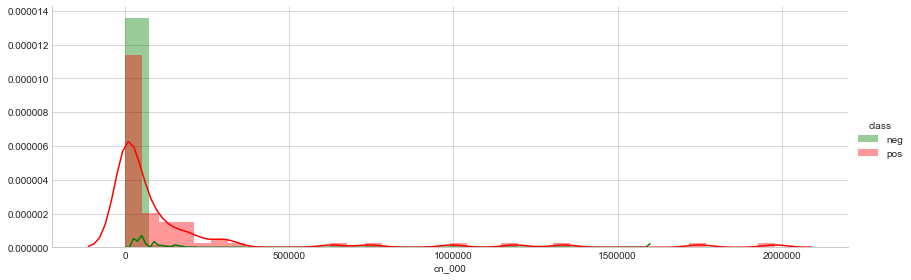

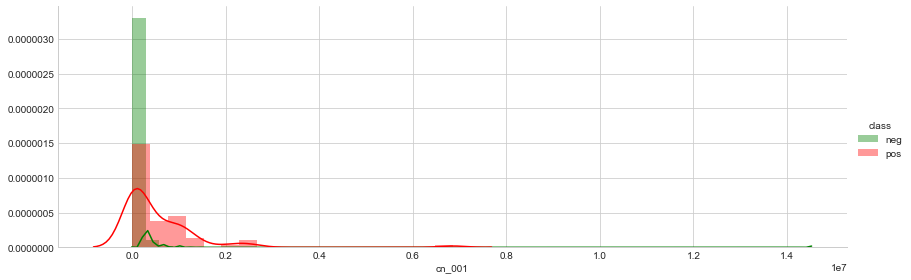

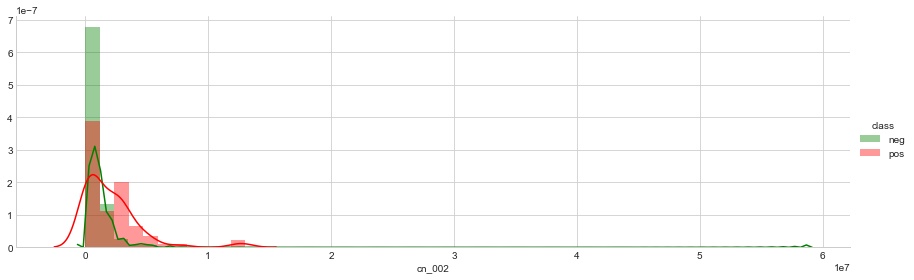

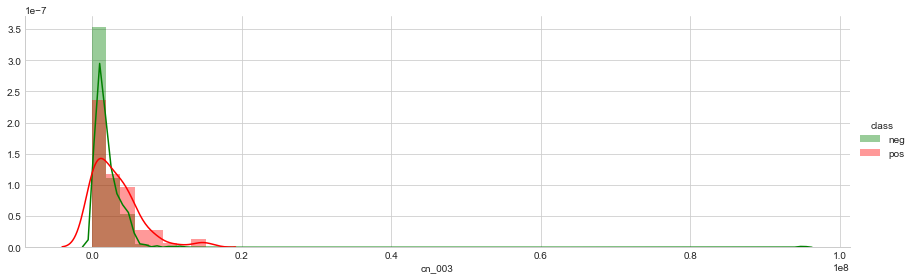

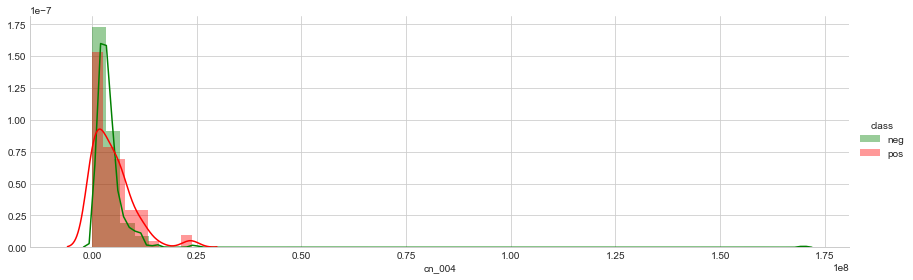

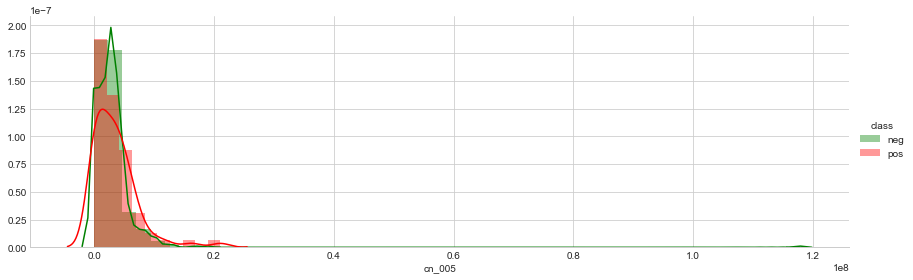

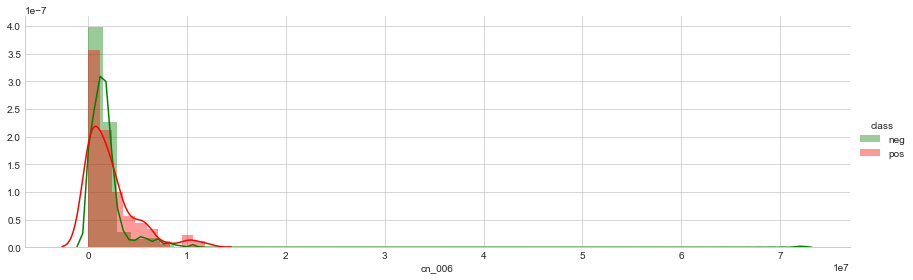

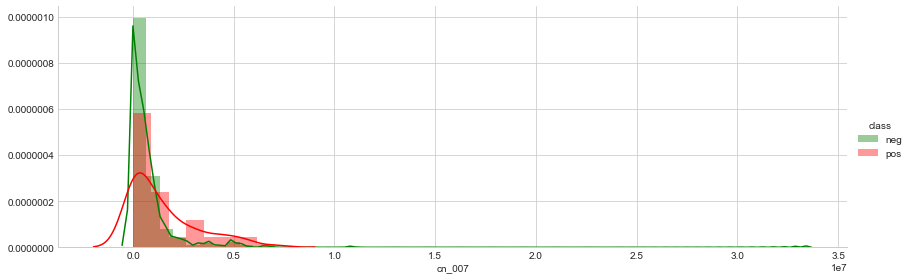

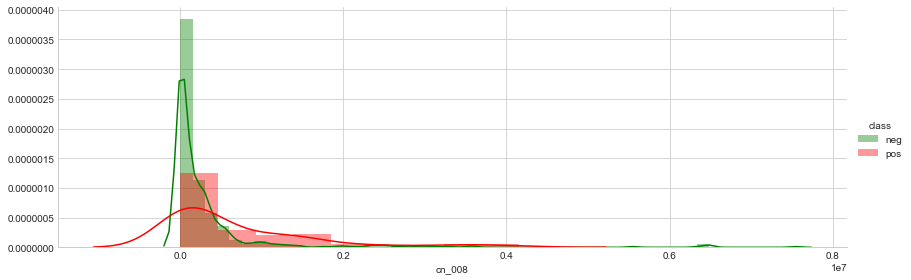

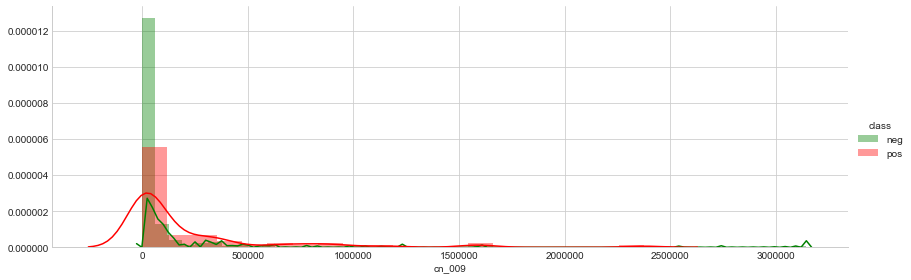

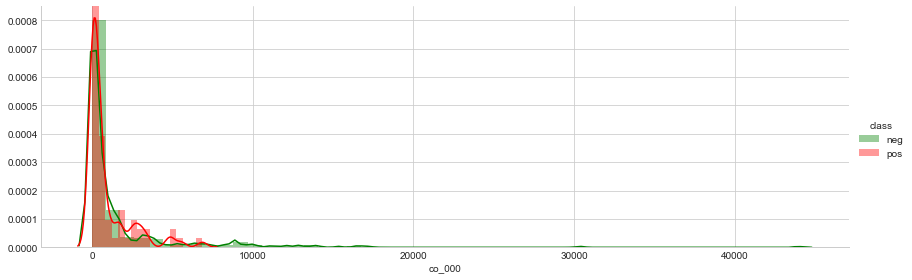

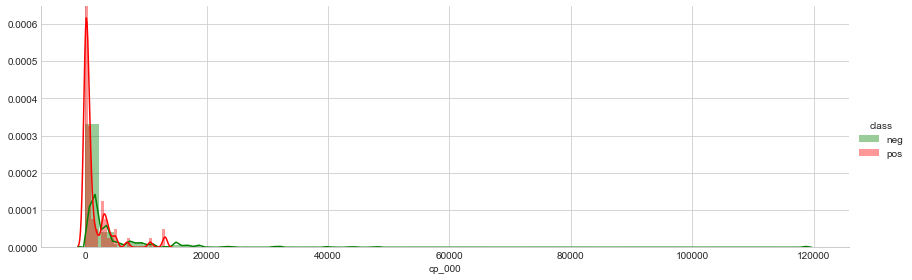

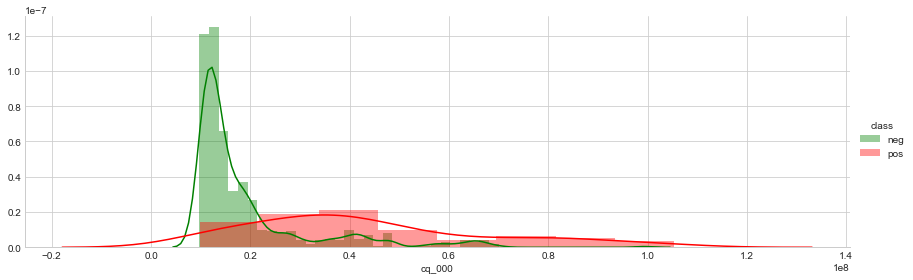

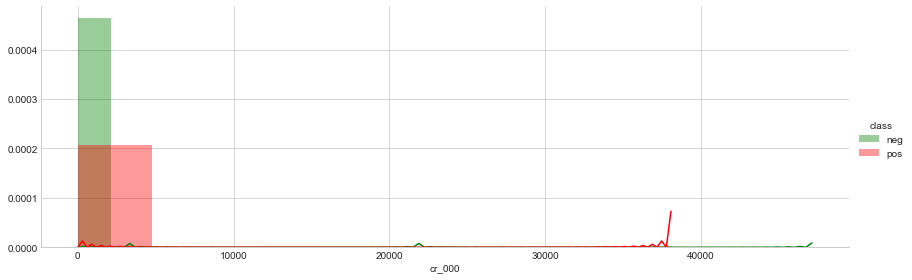

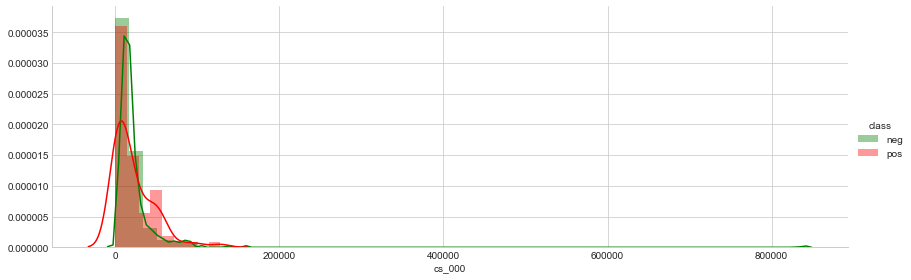

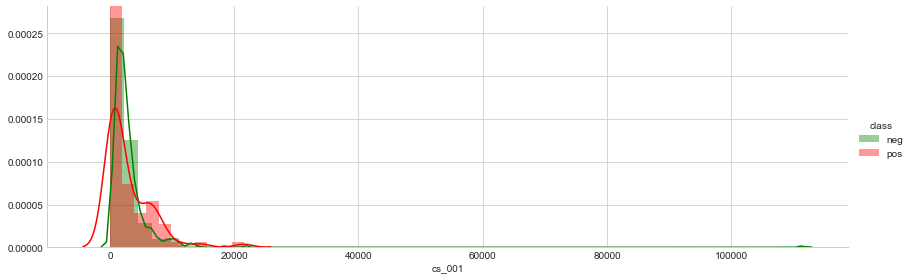

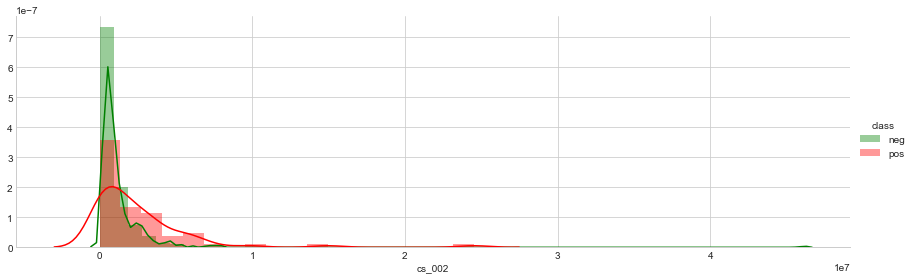

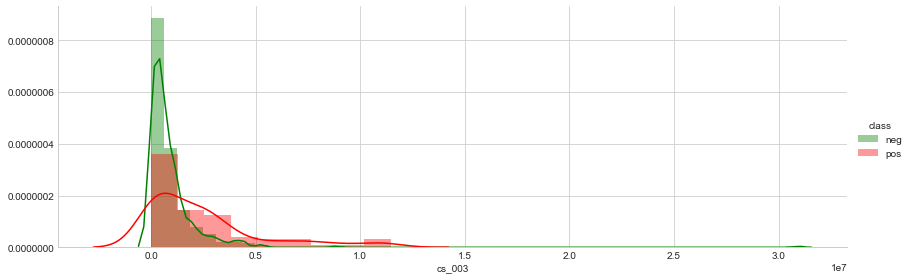

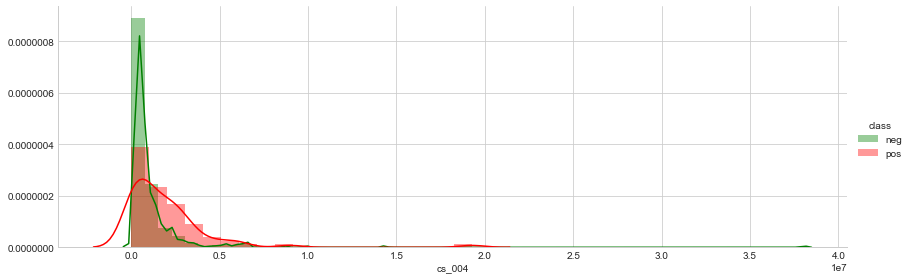

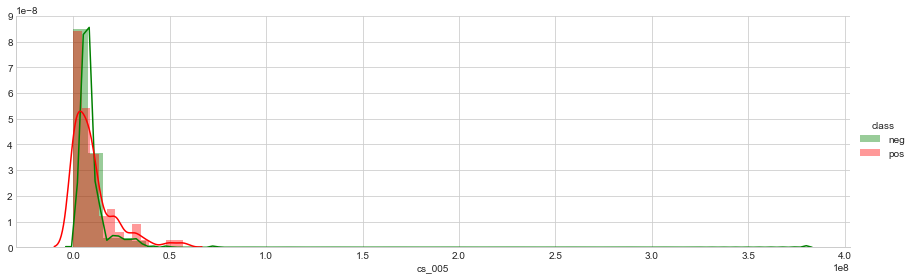

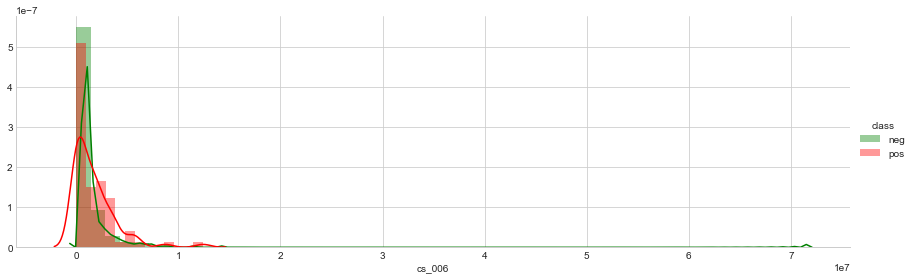

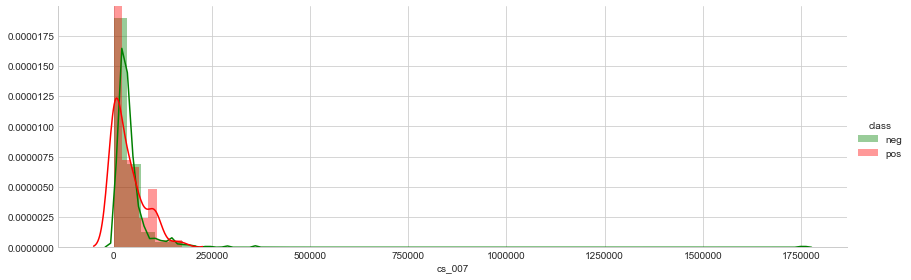

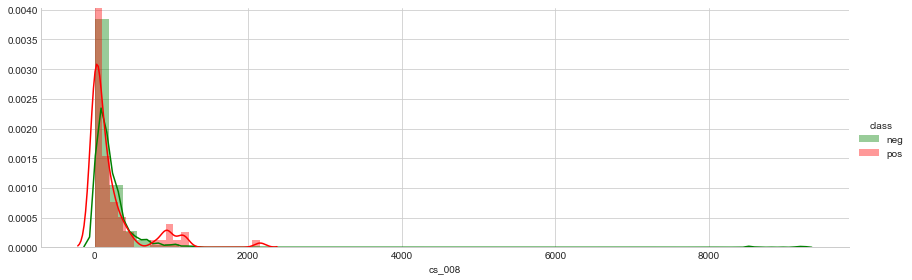

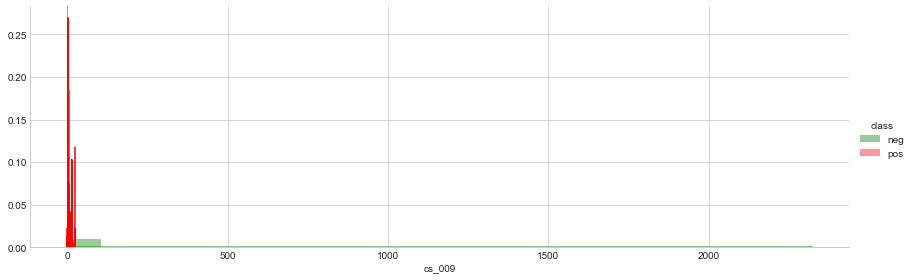

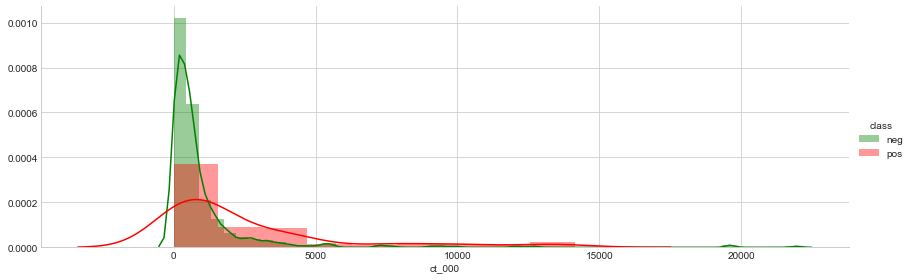

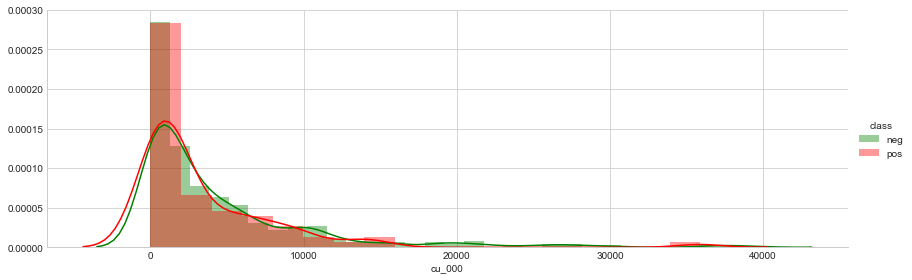

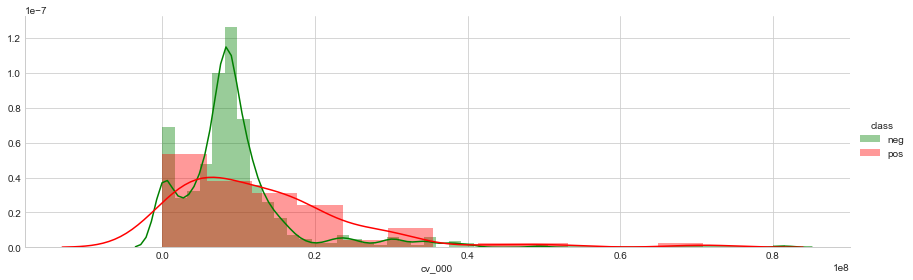

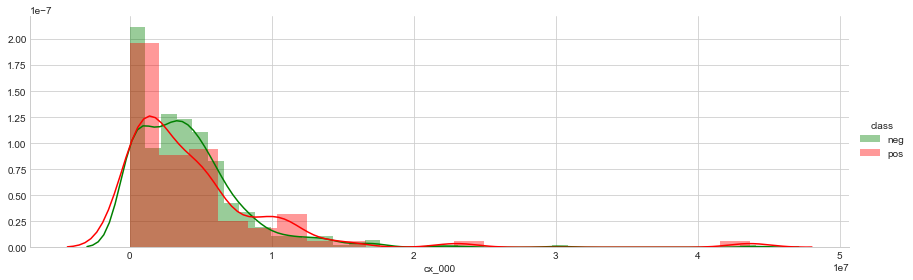

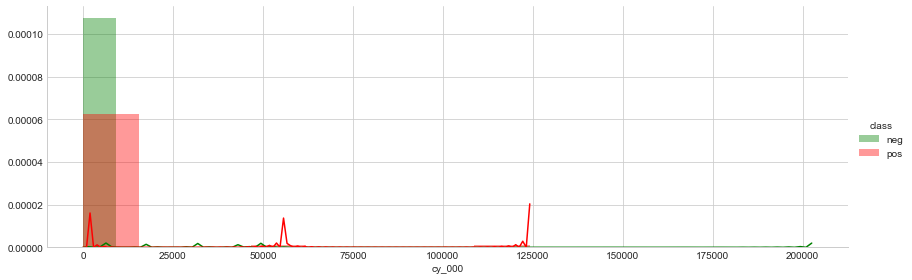

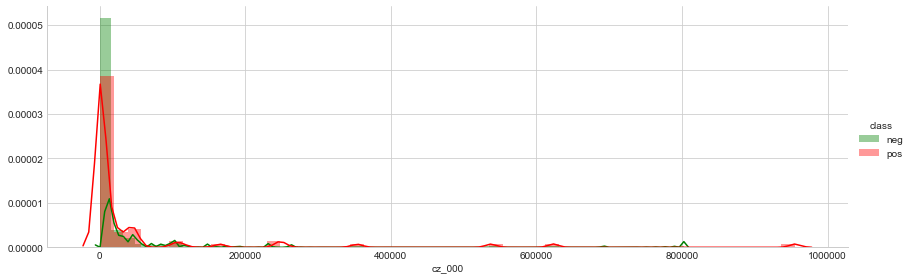

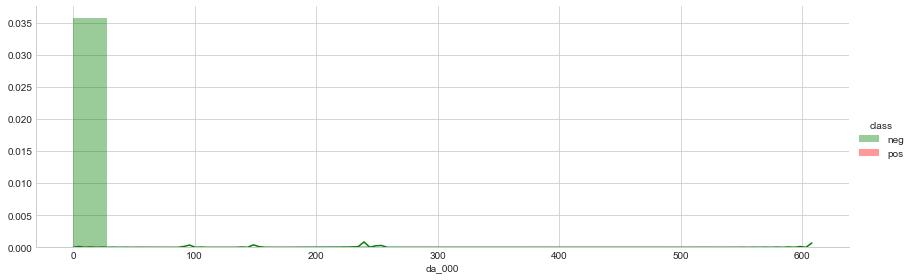

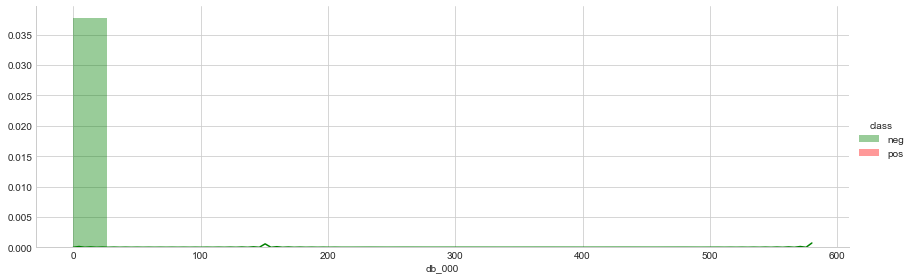

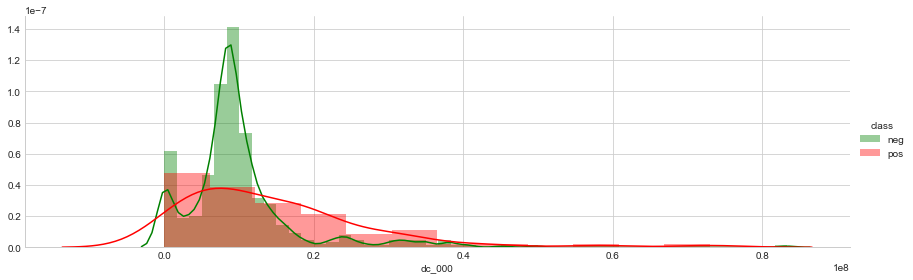

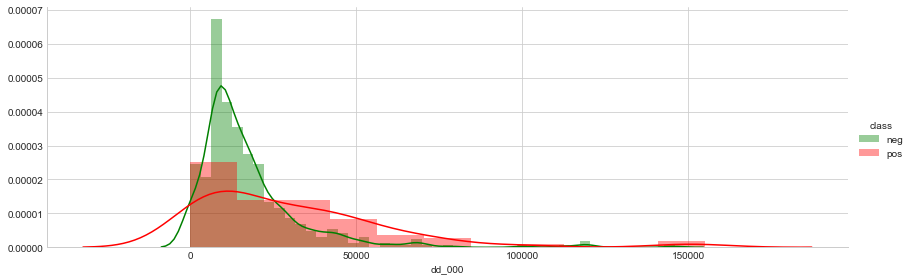

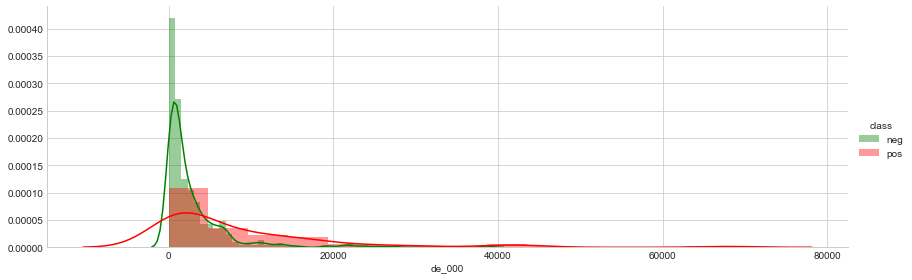

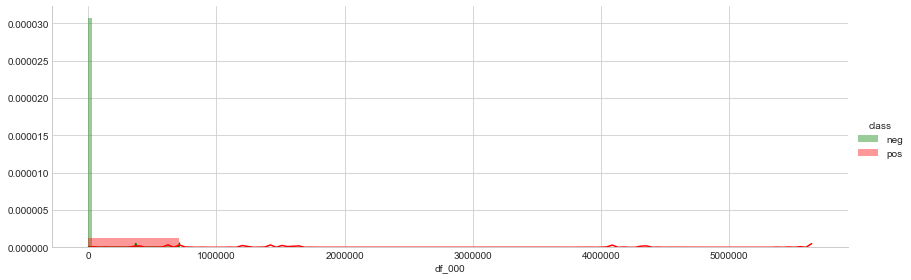

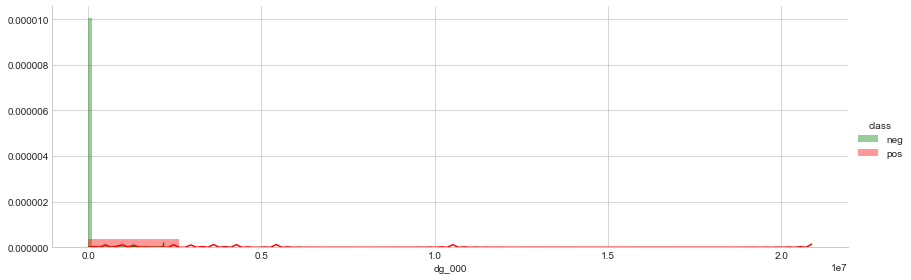

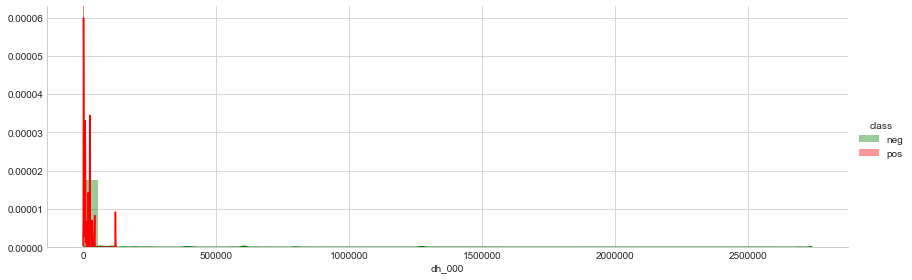

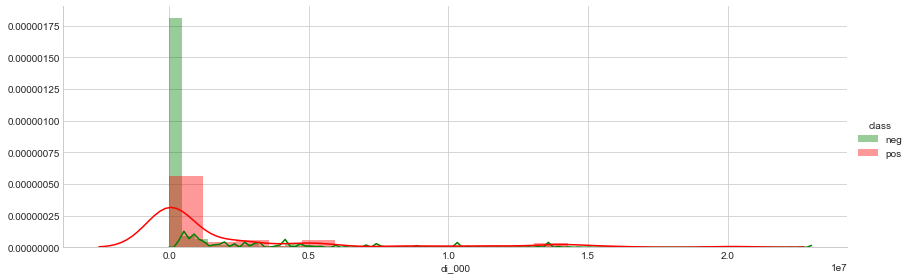

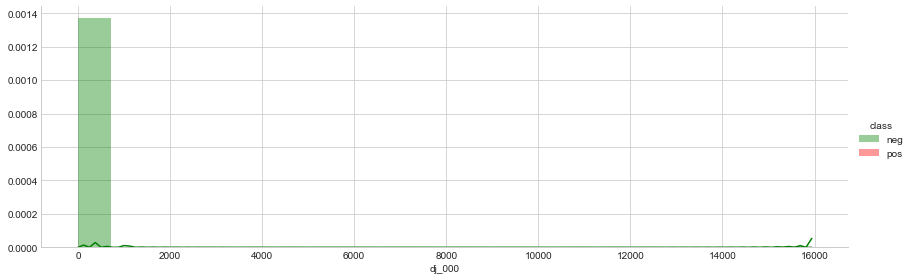

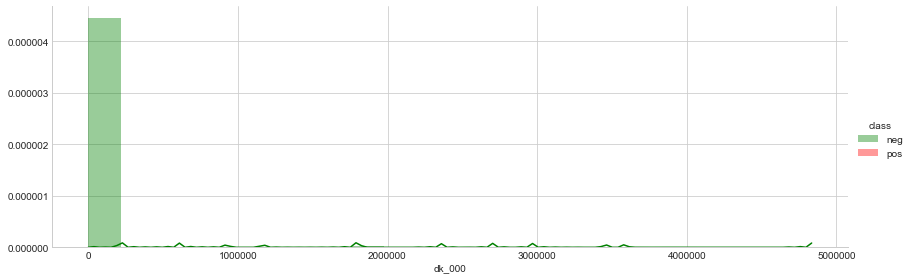

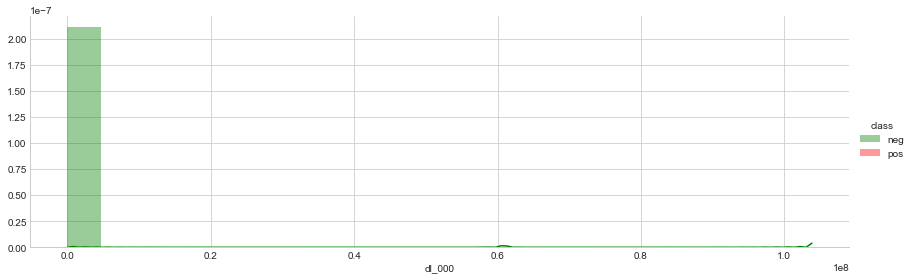

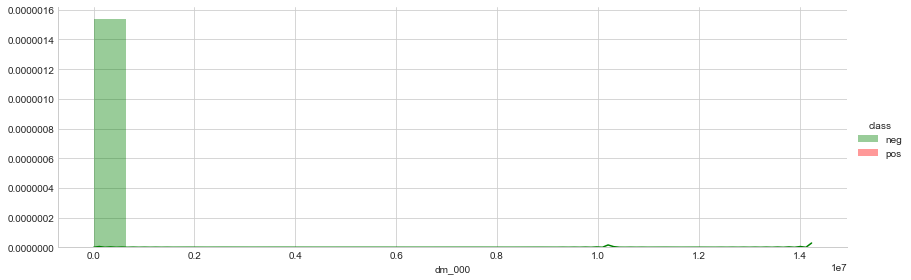

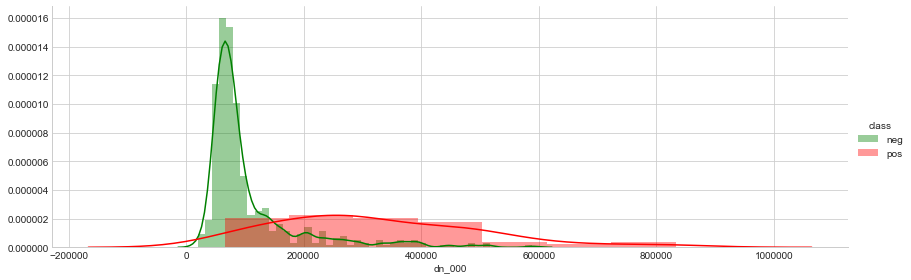

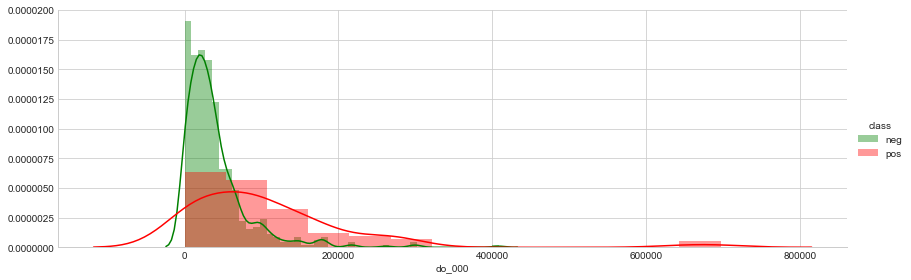

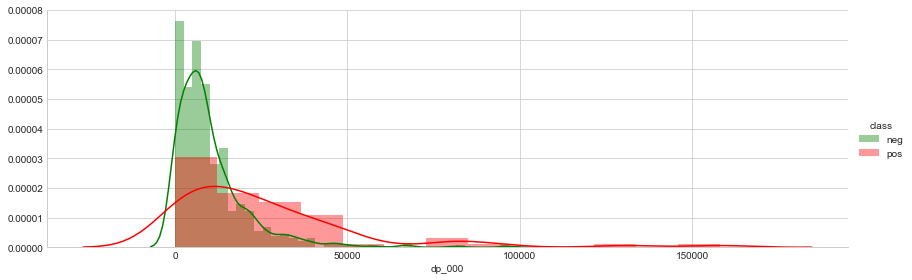

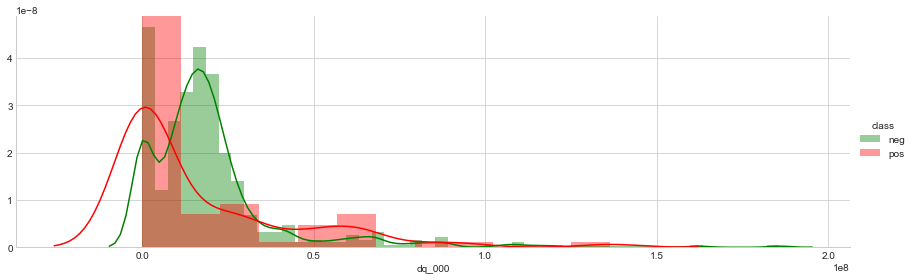

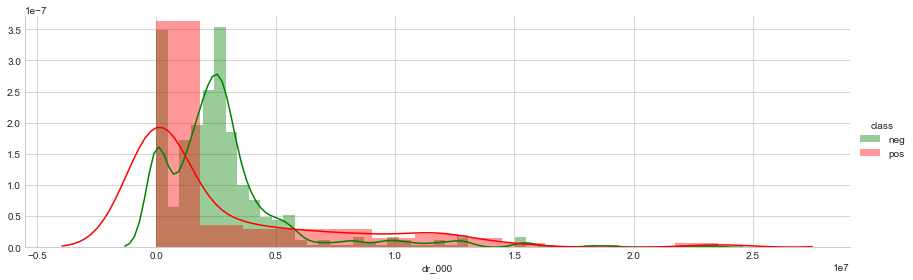

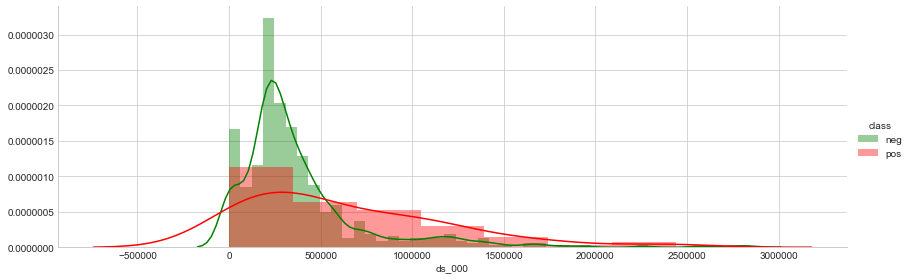

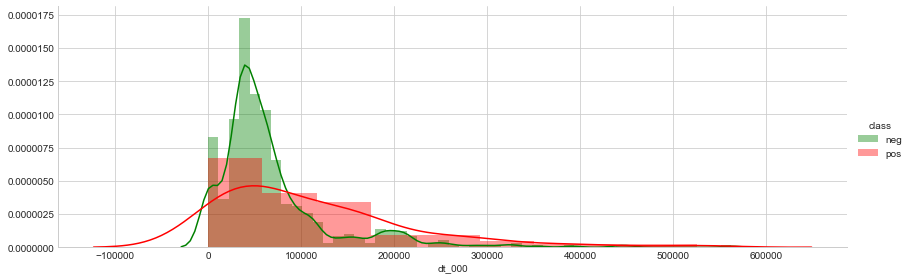

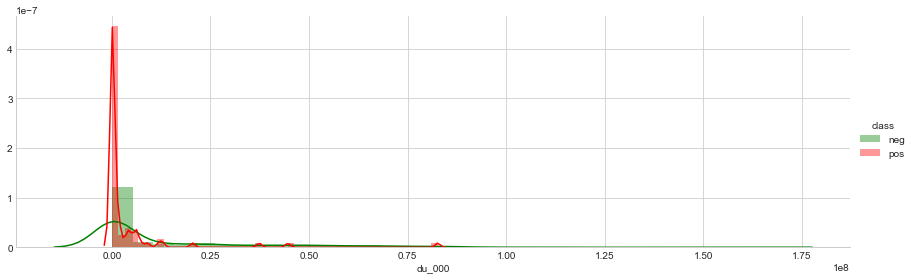

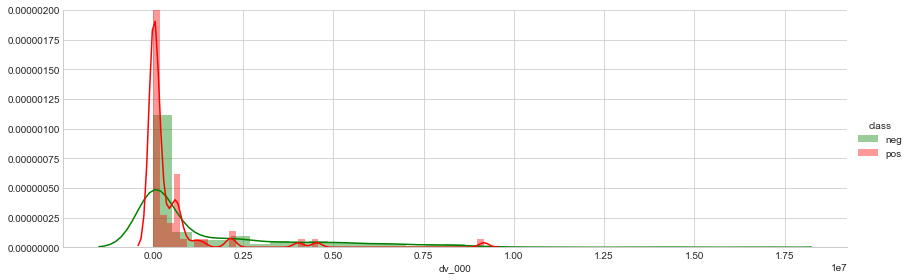

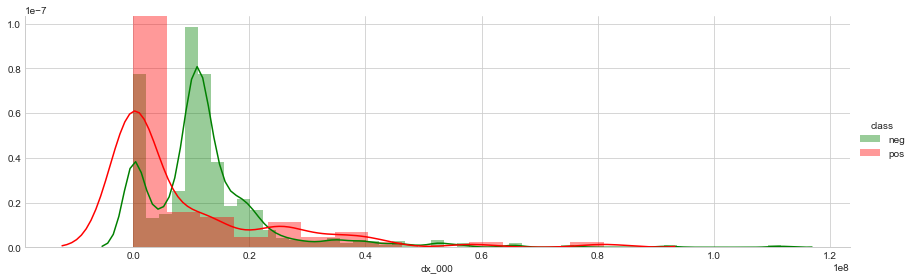

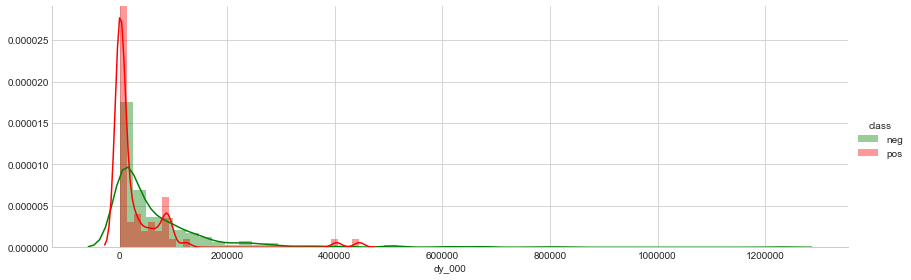

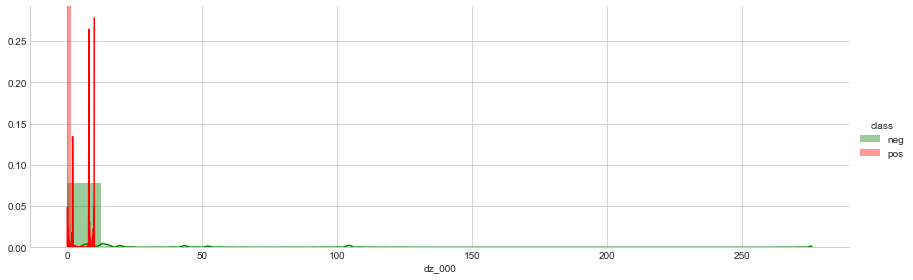

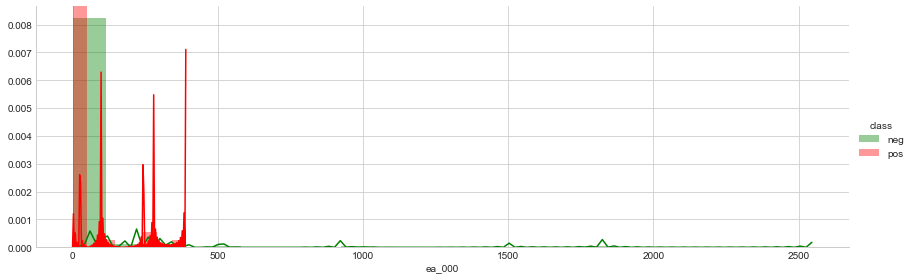

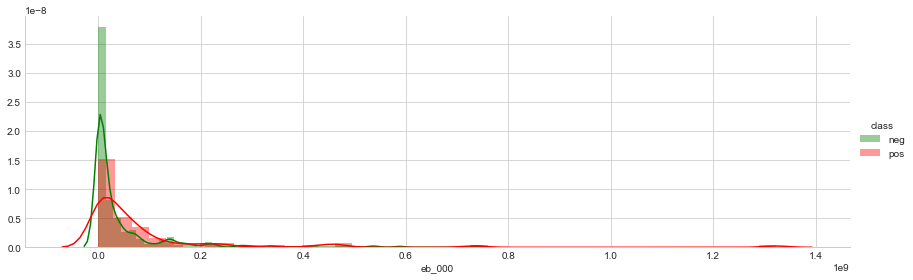

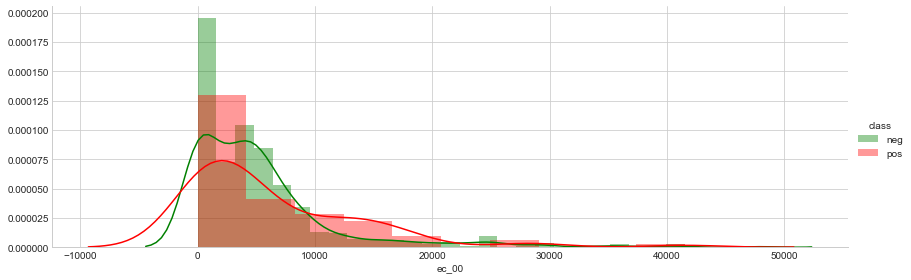

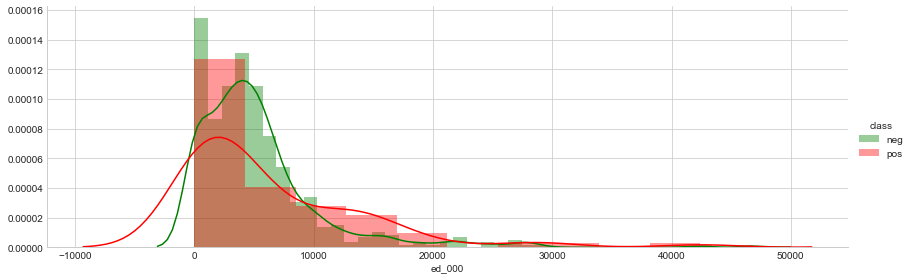

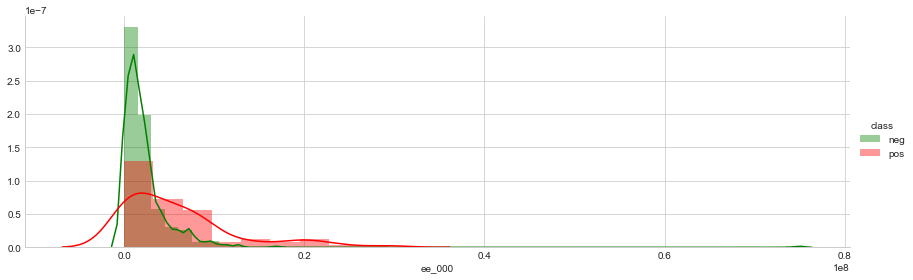

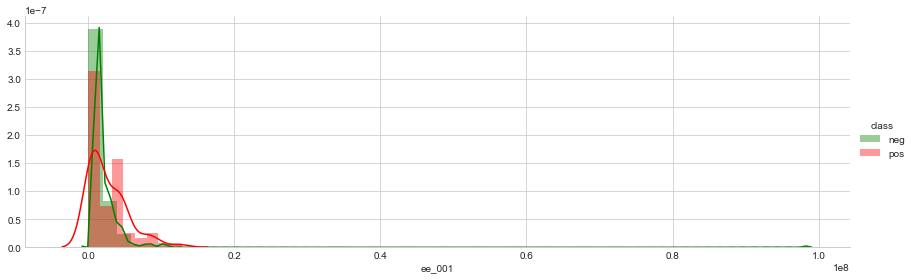

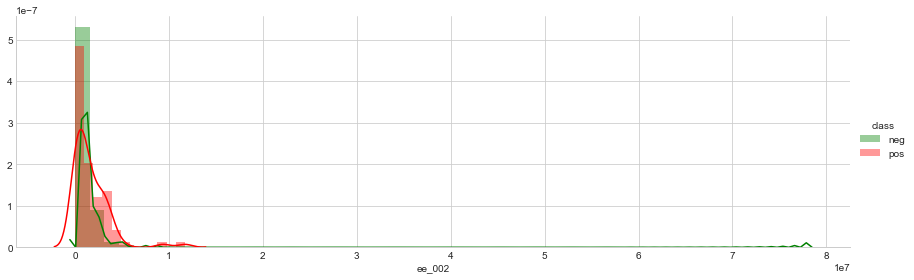

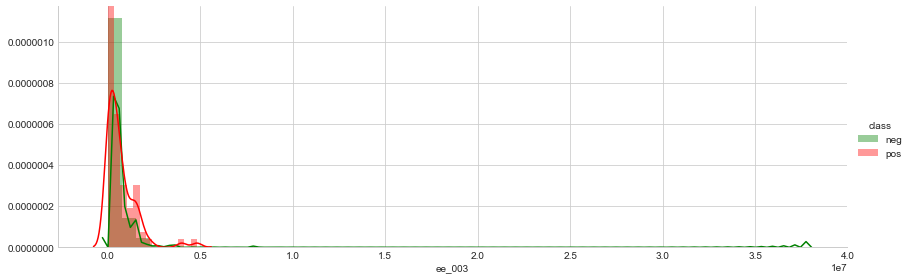

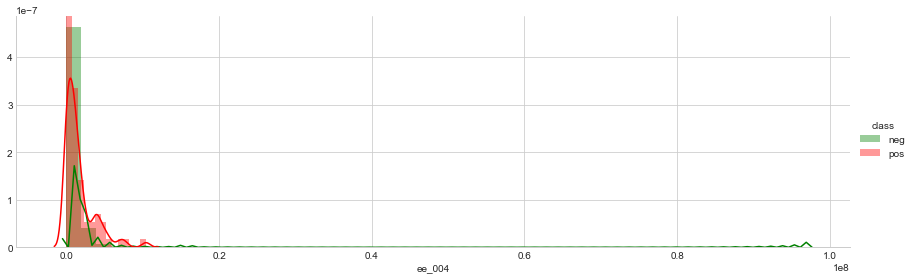

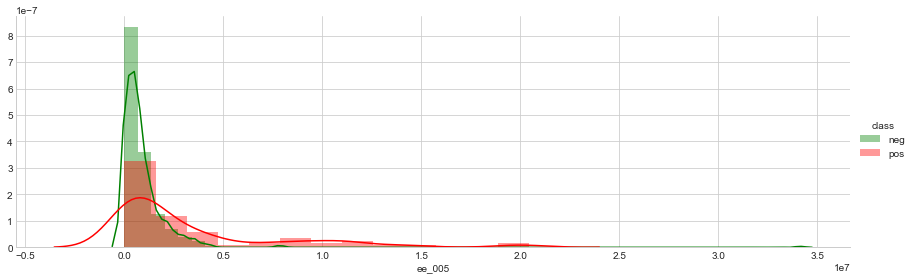

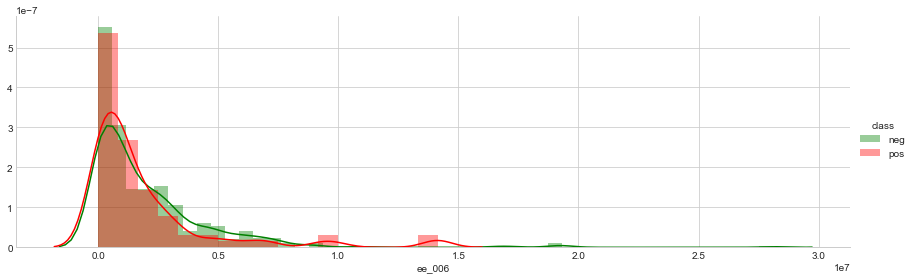

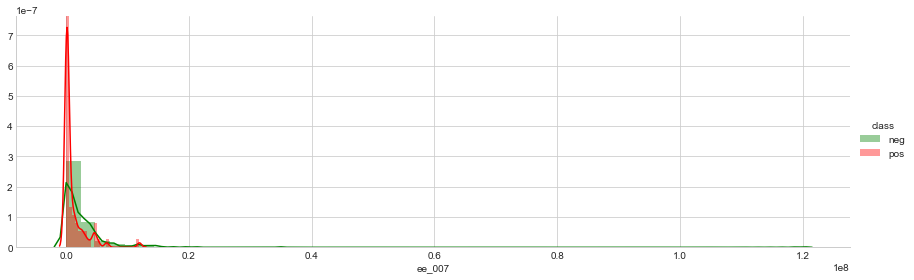

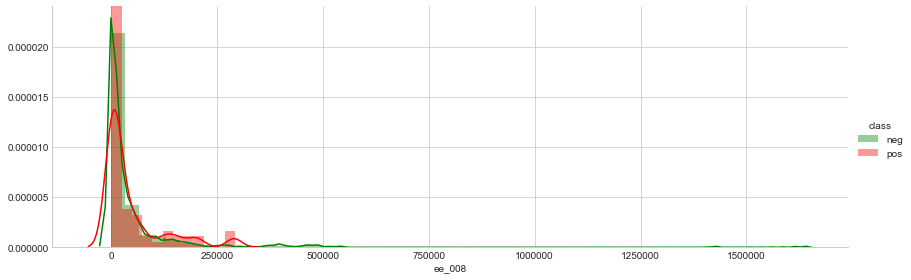

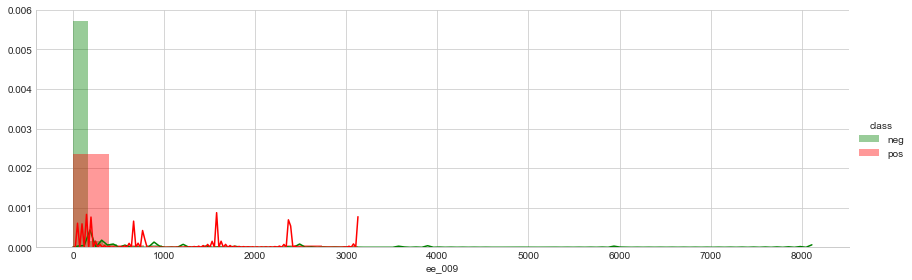

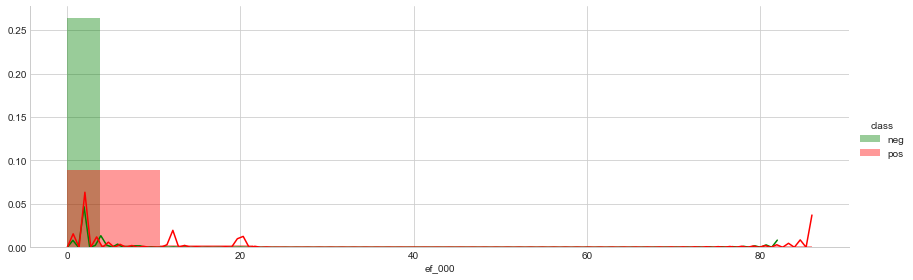

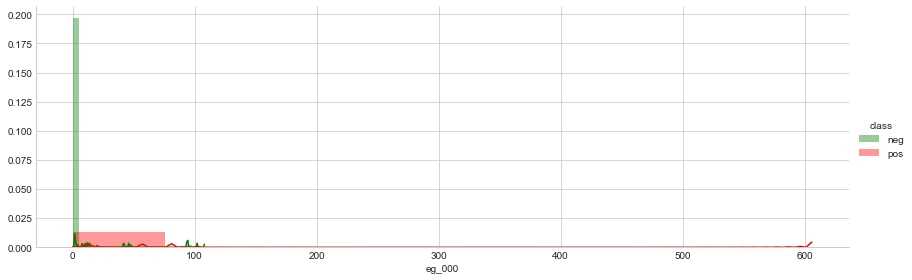

In [27]:
colors = {
    'pos': 'r',
    'neg': 'g'
}
# Plotting Distribution plots of all  anonymized features (V1 - V28)
for col in data_clean.columns:
    if col != 'class':
        sns.FacetGrid(data=data_clean, hue='class', palette=colors, size=4, aspect=3) \
            .map(sns.distplot, col) \
            .add_legend()